# [Run in Collab](https://colab.research.google.com/github/CaptainZoss/dsfinal/blob/master/dsfinal.ipynb)

# Data Science Final Project

First we must set up the workspace and libraries we will be using. 

In [ ]:
#import librarys 
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import clear_output
from sklearn.datasets import make_blobs
import statsmodels.formula.api as smf
import scipy.cluster.hierarchy as sch
from matplotlib.pyplot import figure
from nltk.corpus import stopwords
from sklearn import linear_model
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from google.colab import drive 
from google.colab import files
from sklearn import metrics 
from random import random
from random import seed
import seaborn as sns
from math import exp
import pandas as pd
import numpy as np
import os
import io
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline
import json
! pip install wget
import wget
import os.path
from os import path
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as graph_objs
from plotly.graph_objs import *
import plotly.tools as tools
import plotly.figure_factory as fig_fact
import scipy.stats as stats
import seaborn as sn

Use_Google_Drive= False #@param {type:"boolean"}

if Use_Google_Drive:

    #set up the working directory
    drive.mount('/content/gdrive')
    working_directory = 'My Drive/Data' #@param {type:"string"}
    wd="/content/gdrive/"+working_directory
    if not os.path.exists(wd): os.mkdir(wd)
    os.chdir(wd)

else:
    !git clone https://github.com/CaptainZoss/dsfinal
    %cd dsfinal

wd = os.getcwd()
print("current directory is : " + wd)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=77bd3c465d729c4fd20b8df056bc1b9a7b7af11e7a8e51ae966aa00a9d5a0221
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
Cloning into 'dsfinal'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 7), reused 11 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.
/content/dsfinal
current directory is : /content/dsfinal


The following code downloads and extracts the necessary data files. This might take a while.

In [ ]:
# download data files 
if not path.isfile('yelp_academic_dataset_business.zip'):
  print ("Downloading data files...")
  wget.download("https://github.com/CaptainZoss/dsfinal/blob/master/Data/yelp_academic_dataset_business.zip?raw=true")
  wget.download("https://github.com/CaptainZoss/dsfinal/blob/master/Data/yelp_academic_dataset_user.zip?raw=true")
  wget.download("https://github.com/CaptainZoss/dsfinal/blob/master/Data/yelp_academic_dataset_tip.zip?raw=true")

if not path.isfile('yelp_academic_dataset_business.json'):
  print ("Extracting data files...")
  with zipfile.ZipFile("yelp_academic_dataset_business.zip", 'r') as zip_ref:
      zip_ref.extractall()
  with zipfile.ZipFile("yelp_academic_dataset_user.zip", 'r') as zip_ref:
      zip_ref.extractall()
  with zipfile.ZipFile("yelp_academic_dataset_tip.zip", 'r') as zip_ref:
      zip_ref.extractall()
  print ("Done!")

Extracting data files...
Done!


## Business Understanding

Yelp has become the go-to staple of the modern world when it comes to conveniently accessing information regarding the quality of a business. Users seek this kind of service for many reasons. It could be to decide the best place to eat on a family dinner night or it could be where they can buy good clothes from if they find themselves abroad or in an area that they aren't familiar with. Whatever the purpose may be, the underlying need remains the same: customers are looking for the highest quality, highest-rated businesses around them. Yelp exists to satisfy this very purpose and through its system of reviews, rating, and attributes, it helps customers spend the least amount of time possible to find the best fit for them.

That sums up exactly why we have chosen this dataset to analyze. We believe that understanding the factors that are commonly found across the highest rated, best businesses on Yelp will help inform future/potential businesses and current startups alike on what they need to focus on, what customers around them value the most, and what attributes are likely to get them the best reviews so they can be seen more on Yelp.

Understanding what makes a successful business can be done in several ways, both from a standpoint of the producer and from the consumer side of the equation. We felt it was important to see what made consumers gravitate towards a given establishment. In order to do this we decided to focus on the Yelp user and tip dataset which includes useful information from a reviewer to a potential customer and tells them something brief about the restaurant without fully leaving a review behind. We believe that these datasets can show us patterns of consumer tendencies, meaning that we will be able to determine what it is that consumers value most in their experience. Based on categories of the data such as useful reviews and compliments we will be able to see how overall engagement affects the rating that a restaurant gets. This may inform businesses on what to prioritize to give their customers the best possible experience.

Aside from that, we also take a look at the business dataset of Yelp. This contains great insight into the types of businesses on Yelp, their rating, their attributes, their location, and so on and so forth. Using an amalgam of these features, alongside the analysis we conduct on the other datasets, we believe we can uncover a secret formula/recipe that makes a good business on Yelp and therefore, influence the business understanding of business owners everywhere.

## From the Businesses Perspective

Here, we bring the business dataset.

In [ ]:
# Importing the business dataset
temp = wd + "/yelp_academic_dataset_business.json"
business = pd.read_json(temp, orient = 'records', lines = True)


Let's take an initial look at our dataset and observe what features we are working with and how the data has been arranged for us.

In [ ]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


It seems like we have the name, location, rating, type, hours of operation, and what's offered (attributes column) by each restaurant. Before moving forward, let's check what our values are like in each column and whether or not there any null values.

In [ ]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   209393 non-null  object 
 1   name          209393 non-null  object 
 2   address       209393 non-null  object 
 3   city          209393 non-null  object 
 4   state         209393 non-null  object 
 5   postal_code   209393 non-null  object 
 6   latitude      209393 non-null  float64
 7   longitude     209393 non-null  float64
 8   stars         209393 non-null  float64
 9   review_count  209393 non-null  int64  
 10  is_open       209393 non-null  int64  
 11  attributes    180348 non-null  object 
 12  categories    208869 non-null  object 
 13  hours         164550 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 22.4+ MB


In [ ]:
business.isna().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      29045
categories        524
hours           44843
dtype: int64

Although there are some null values in the attributes, categories, and hours columns, we can move forward with that. Firstly, attributes and categories seem to be grouped in the sense that each row entry is a list of items. We will try to split those into their constituent words to get a better picture. There isn't much information we can extract from hours because of the way that data has been provided and the fact that it doesn't follow a format that would be nice to work with.

As mentioned above, each entry in the categories seems to be a list of the most commonly associated type/category with that business. We can try to split all 3 words in each entry and create a new column for each of those. Although this will result in some overlap, we will be taking a look at all of them individually to get a better picture of the businesses.

In [ ]:
temp = business['categories'].str.split(',', expand=True)[[0,1,2]]
temp.columns = ['Category A', 'Category B', 'Category C']
business = pd.concat([business, temp], axis=1)
business = business.drop(['categories'], axis=1)
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,hours,Category A,Category B,Category C
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",Active Life,Gun/Rifle Ranges,Guns & Ammo
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...",None,Health & Medical,Fitness & Instruction,Yoga
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,None,Pets,Pet Services,Pet Groomers
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...",Hardware Stores,Home Services,Building Supplies
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...",Home Services,Plumbing,Electricians


Now our dataset looks much better with categories split into 3 columns. This is much easier to work and will give us more clear results when it comes to distribution and popularity.

The is_open column looks very interesting at first glance. Since we are trying to understand what makes a good business based off Yelp reviews and Yelp data, we can look at that column and delve deeper. Because of the fact that is_open is in a 0 or 1 format conveniently, it makes it perfect for logistic regression. However, we can get to that a bit later.

First let's take a look at how many businesses in the dataset are still open and how many have closed down. Since Yelp published this dataset for public use for businesses to understand the landscape, we can hypothesize that most businesses will be open. Additionally, as this is pre-pandemic data, we should expect most businesses to still be open.

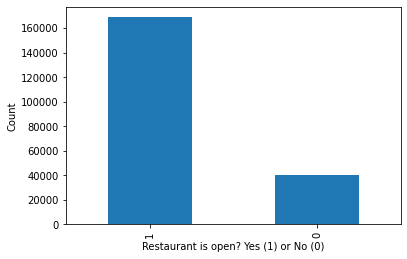

In [ ]:
business['is_open'].value_counts().plot(kind="bar", xlabel = 'Restaurant is open? Yes (1) or No (0)', ylabel = 'Count');

Our hypothesis was correct it seems. The overwhelming majority of businesses are still open. This is good because not all of them will be great businesses (there will be average ones in the middle) and this will allow us to sift through great and normal businesses and understand the factors that distinguish. Similarly, the presence of closed businesses presents the unique opportunity to look at factors present in them and understand how to not be a bad business, per se.

Next, we can take a look at how the businesses are rated. This involves looking at the distribution of the star ratings.

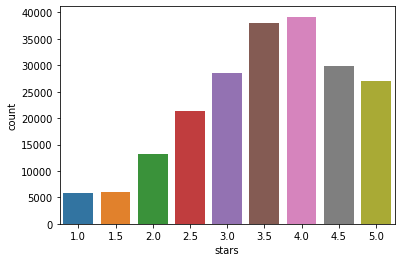

In [ ]:
sns.countplot(x='stars', data=business);

This is an interesting one as well because it leads us to ask more questions. As we see from the chart above, most businesses are ranked average or higher than average (i.e. at least average). This is the case if we're using 3 as the logical middle point and determining it to be the average mark. From this, we can ask ourselves whether people are only leaving reviews when the business was satisfactory, good, or great? Is this a case where if the quality of the product of the business is below a certain level, people will not bother reviewing them and will just move on? Human behavior would certainly suggest so. When we have a bad experience at a business or restaurant, we usually sort it out in person (complain to the manager, return the item, etc). We never really leave a bad review if that's the case. On the flip side, if we had a remarkable experience, then we are more likely to leave a favorable review, which could explain the positively skewed distribution above.

Now, let's run logistic regression between stars and is_open

In [ ]:
# Logistic Regression to predict if a restaurant is open based on star rating
X = business['stars'].values.reshape(-1,1)
y = business['is_open'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = linear_model.LogisticRegression(random_state = 42)
clf = lr.fit(X_train, np.ravel(y_train))

y_pred = lr.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
ap = 100 * acc
ap

80.6147204340102

Here, we can see that our model to predict whether a business is still open based on the star rating it has averaged is about 81% accurate. This seems to be a good figure and extrapolates from the logical conclusion most people would make when they look at a high rated business.

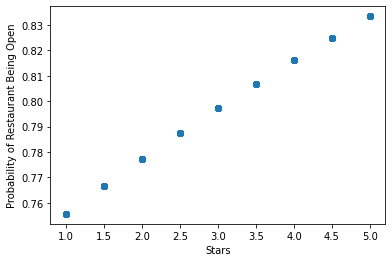

In [ ]:
plt.scatter(X,lr.predict_proba(X)[:,1]);
plt.xlabel("Stars");
plt.ylabel("Probability of Restaurant Being Open");

This plot of the stars and probability looks like a linear regression at first but it shows the correlation that exists between the variables. Here, we can more clearly see that the higher the rating of the business, the more likely it is to stay open and be in business.

In [ ]:
# Logistic Regression to predict if a restaurant is open based on review count
X = business['review_count'].values.reshape(-1,1)
y = business['is_open'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = linear_model.LogisticRegression(random_state = 42)
clf = lr.fit(X_train, np.ravel(y_train))

y_pred = lr.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
ap = 100 * acc
ap

80.37593841334123

Our 2nd logistic regression looks at the data in the review_count column (which is how many reviews a business has received) and uses that to predict whether or not a business is still open. We can see that this model is predicting the outcome with the almost same accuracy of 80%.

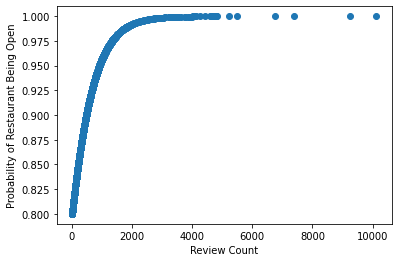

In [ ]:
plt.scatter(X,lr.predict_proba(X)[:,1]);
plt.xlabel("Review Count");
plt.ylabel("Probability of Restaurant Being Open");

Our plot here shows a steep, high rising curve at first. This indicates to us that past a certain threshold of reviews received (which seems to lie around 500 to 1000 reviews), a business is pretty much guaranteed to stay open.

These 2 models have been important in establishing key facts about businesses on Yelp. While it is logical to assume that the higher the rating and the more reviews received, the more likely a business is to be open, we cannot fully confirm that unless we look at the data. This provides an important foundation because it suggests that our initial questions to ask of this dataset were the right ones. Now, with this foundation established, we can move forward.

Since we are also provided with location data, we should delve into that to see if there are certain locations that do better than others and if that is the case, what is it about those locations that make them better?

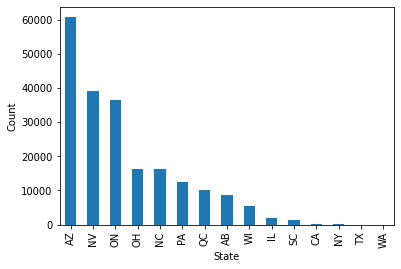

In [ ]:
business['state'].value_counts()[:15].plot(kind="bar", xlabel = 'State', ylabel = 'Count');

For this distribution, we focused on looking the top 15 states. There were too many states to effectively include in the visualization and from 15 and onward (as the end of the chart hints at), the numbers started trailing off and approached 0, making them essentially useless. However, from what we got, we can see that 3 states have the most number of reviews: Arizona (US), Nevada (US), and Ontario (Canada). Aside from Ontario (which is a hub of Canada and has many metropolitan centers), it is interesting that US states like Arizona and Nevada appear above more diverse, cultural hubs of the country like New York, California, and Florida (all of which are also more populated than Arizona and Nevada).

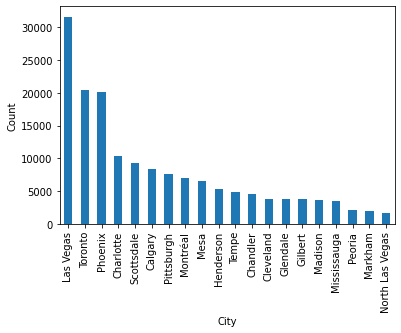

In [ ]:
business['city'].value_counts()[:20].plot(kind="bar", xlabel = 'City', ylabel = 'Count');

Taking a look at look at the top 20 cities with the most reviews reaffirms our conclusion in the visualization before this. Since we saw Arizona, Nevada, and Ontario as the states with the most reviews, it is only natural that we see the most important city of each of the 3 states come out top here. Las Vegas (Nevada), Toronto (Ontario), and Phoenix (Arizona). We can see that Toronto contributes to around half the reviews in Ontario, Las Vegas contributes more than 3/4 of the reviews in Nevada, and Phoenix makes up approximately 1/3 of the reviews in Arizona.

Because these 3 states and these 3 cities in particular are doing so well in terrms of businesses on Yelp, it is best if we delve even deeper and take a look at them specifically to understand what common features they and why they are so popular.

We create 3 more datasets, corresponding to each of the 3 cities determined above.

In [ ]:
# Let's take a closer look at LV, Toronto, Phoenix
lv = business.loc[business['city'] == 'Las Vegas']
tor = business.loc[business['city'] == 'Toronto']
phx = business.loc[business['city'] == 'Phoenix']

First, we go through the data for Las Vegas, Nevada.

In [ ]:
lv.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,hours,Category A,Category B,Category C
6,oiAlXZPIFm2nBCt0DHLu_Q,Green World Cleaners,"6870 S Rainbow Blvd, Ste 117",Las Vegas,NV,89118,36.063977,-115.241463,3.5,81,1,"{'BusinessParking': '{'garage': False, 'street...","{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ...",Dry Cleaning & Laundry,Local Services,Laundry Services
16,uZuh51lXu7tsrC8RAwkg1A,Manolo Blahnik,3131 Las Vegas Blvd,Las Vegas,NV,89109,36.125732,-115.167608,4.5,32,0,"{'BusinessParking': '{'garage': True, 'street'...",None,Shopping,Shoe Stores,Fashion
36,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147,36.099738,-115.301568,2.5,15,0,"{'Alcohol': 'u'none'', 'WiFi': 'u'no'', 'GoodF...",None,Mexican,Restaurants,Fast Food
42,fhNf_sg-XzZ3e7HEVGuOZg,Meat Chix And Wieners,6530 S Decatur Blvd,Las Vegas,NV,89118,36.071196,-115.207463,3.0,10,0,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",Burgers,Restaurants,American (Traditional)
51,5XMKDYmMGSKkCkrYoELxzg,Annette Thomas Hair Colorist Specialist,"101 S Rainbow Blvd, Ste 23, Darby's Hairitage",Las Vegas,NV,89107,36.172534,-115.244762,5.0,7,1,"{'GoodForKids': 'True', 'BusinessParking': '{'...",None,Hair Stylists,Hair Salons,Beauty & Spas


As zip codes are such an important aspect of location in the United States and can be used to determine an individual's socioeconomic status, we can take a look what zip codes are most dominant in the reviews in Las Vegas.

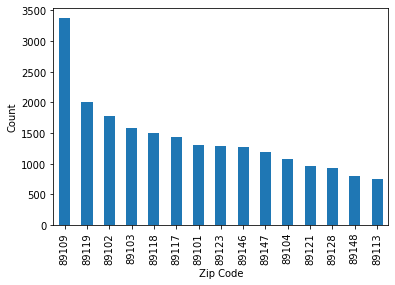

In [ ]:
# Are there any dominant zip codes?
lv['postal_code'].value_counts()[:15].plot(kind="bar", xlabel = 'Zip Code', ylabel = 'Count');

From this, it seems like zip code 89109 is overwhelming dominant in Las Vegas.

To understand why Las Vegas (and Nevada in turn) is getting so many reviews, we need to understand what types of businesses are present there.

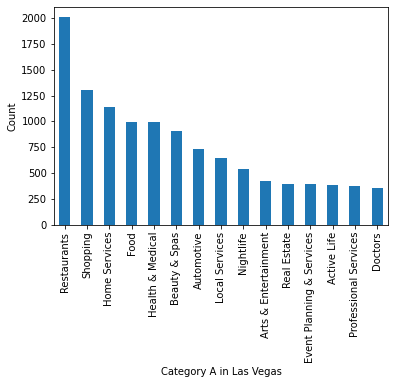

In [ ]:
lv['Category A'].value_counts()[:15].plot(kind="bar", xlabel = 'Category A in Las Vegas', ylabel = 'Count');

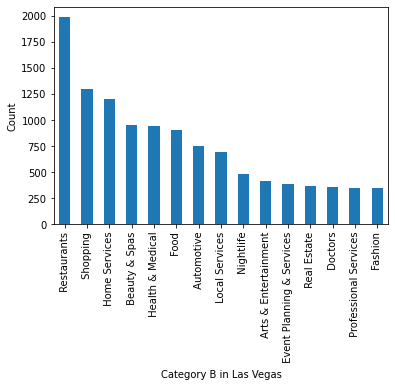

In [ ]:
lv['Category B'].value_counts()[:15].plot(kind="bar", xlabel = 'Category B in Las Vegas', ylabel = 'Count');

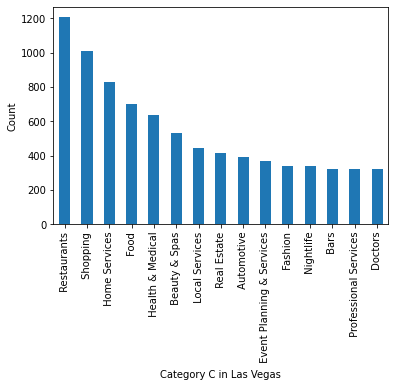

In [ ]:
lv['Category C'].value_counts()[:15].plot(kind="bar", xlabel = 'Category C in Las Vegas', ylabel = 'Count');

The three distributions above for Category A, B, and C show us that restaurants are overwhelming reviewed on Yelp. This is in line with the whole image and idea of Yelp since even I assumed Yelp was just for restaurants. But this just means that restaurants are generally more reviewed than other businesses on Yelp, leading to this false perception. From the distributions above, we can also see that shopping follows restaurants in second place.

Next, we can take a look at the top-rated businesses in Las Vegas and maybe go deeper into what they are offering.

In [ ]:
# Let's take a look at the businesses themselves now
lv[['name', 'review_count', 'stars']].sort_values(ascending=False, by="stars")[0:25]

,name,review_count,stars
105621,Krissy's Hair and Makeup Services,21,5.0
91318,Air Done Right,112,5.0
90834,Las Vegas Electrician,3,5.0
90896,"Michele Kubiak, Realtor at Signature Real Esta...",5,5.0
90938,Kustom Install,13,5.0
90987,Come Sit Stay Petwatch,3,5.0
91062,Vitality Family Chiropractic,10,5.0
91070,A Nevada Plumbing,4,5.0
91335,"Laurie Bloch, DMD - Exceptional Dentistry",11,5.0
89668,Bubble Shave Ice,121,5.0


Here, we see that the top 25 rated businesses in Las Vegas all have 5 star reviews. This doesn't really help us since the number of reviews are all over the place. Some of the businesses have 3 reviews whereas others have over 100. And since there are even more 5 star rated businesses beyond the top 25, there is not much we can learn from looking at them generally.

This calls for us to look at the number of reviews and pair that with the type of business to get a more clear picture.

In [ ]:
lv[['name', 'review_count', 'stars', 'Category A', 'Category B', 'Category C']].sort_values(ascending=False, by="review_count")[0:10]

,name,review_count,stars,Category A,Category B,Category C
81545,Bacchanal Buffet,10129,4.0,Sandwiches,Breakfast & Brunch,Food
118008,Mon Ami Gabi,9264,4.0,Restaurants,French,Steakhouses
147379,Wicked Spoon,7383,3.5,Buffets,Breakfast & Brunch,Restaurants
83020,Hash House A Go Go,6751,4.0,Breakfast & Brunch,Restaurants,Food
201975,Gordon Ramsay BurGR,5494,4.0,Burgers,Restaurants,American (Traditional)
95962,Earl of Sandwich,5232,4.5,Restaurants,Food Delivery Services,Salad
22754,Yardbird Southern Table & Bar,4828,4.5,Restaurants,American (New),Southern
205740,The Buffet At Wynn,4803,3.5,Food,Buffets,Event Planning & Services
145294,Secret Pizza,4803,4.0,Pizza,Restaurants,None
77432,The Cosmopolitan of Las Vegas,4740,4.0,Arts & Entertainment,Casinos,Hotels & Travel


The initial idea was going to be sorting the businesses by the number of reviews they received and if needed, sorting them by restaurants/food type. However, as we see above, this will not be needed since even out of the top 10, 9 of the most reviewed businesses are restaurants. This trend continues further down the list as we increase the number to be displayed.

In [ ]:
# Now let's look at the attributes feature these top restaurants provide
lv[['name', 'attributes', 'review_count']].sort_values(ascending=False, by="review_count")[0:10]

,name,attributes,review_count
81545,Bacchanal Buffet,"{'BikeParking': 'False', 'OutdoorSeating': 'Fa...",10129
118008,Mon Ami Gabi,"{'RestaurantsDelivery': 'False', 'GoodForKids'...",9264
147379,Wicked Spoon,"{'GoodForKids': 'True', 'OutdoorSeating': 'Fal...",7383
83020,Hash House A Go Go,"{'RestaurantsPriceRange2': '2', 'NoiseLevel': ...",6751
201975,Gordon Ramsay BurGR,"{'Caters': 'False', 'RestaurantsDelivery': 'Fa...",5494
95962,Earl of Sandwich,"{'BusinessParking': '{'garage': True, 'street'...",5232
22754,Yardbird Southern Table & Bar,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...",4828
205740,The Buffet At Wynn,"{'RestaurantsAttire': ''casual'', 'Corkage': '...",4803
145294,Secret Pizza,"{'RestaurantsReservations': 'False', 'Alcohol'...",4803
77432,The Cosmopolitan of Las Vegas,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",4740


Now, we get to the most important part of the dataset and the aspect we intended to look at. Here, we see the various attributes offered by the most reviewed businesses but since this is organized in a list format per entry, there is a need to split it into its constituents.

In [ ]:
df = pd.concat([lv.drop(['attributes'], axis=1), lv['attributes'].apply(pd.Series)], axis=1)
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,hours,Category A,Category B,Category C,BusinessParking,BikeParking,WiFi,RestaurantsPriceRange2,BusinessAcceptsCreditCards,Alcohol,GoodForKids,RestaurantsDelivery,RestaurantsReservations,OutdoorSeating,RestaurantsGoodForGroups,RestaurantsTakeOut,Caters,HasTV,Ambience,RestaurantsAttire,NoiseLevel,ByAppointmentOnly,WheelchairAccessible,AcceptsInsurance,Music,GoodForMeal,DriveThru,DogsAllowed,RestaurantsTableService,HappyHour,BusinessAcceptsBitcoin,HairSpecializesIn,CoatCheck,BestNights,GoodForDancing,Corkage,BYOB,Smoking,BYOBCorkage,AgesAllowed,RestaurantsCounterService,DietaryRestrictions,Open24Hours
6,oiAlXZPIFm2nBCt0DHLu_Q,Green World Cleaners,"6870 S Rainbow Blvd, Ste 117",Las Vegas,NV,89118,36.063977,-115.241463,3.5,81,1,"{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ...",Dry Cleaning & Laundry,Local Services,Laundry Services,"{'garage': False, 'street': False, 'validated'...",True,u'no',1,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,uZuh51lXu7tsrC8RAwkg1A,Manolo Blahnik,3131 Las Vegas Blvd,Las Vegas,NV,89109,36.125732,-115.167608,4.5,32,0,None,Shopping,Shoe Stores,Fashion,"{'garage': True, 'street': False, 'validated':...",True,NaN,4,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147,36.099738,-115.301568,2.5,15,0,None,Mexican,Restaurants,Fast Food,"{'garage': False, 'street': False, 'validated'...",True,u'no',1,True,u'none',True,False,False,False,True,True,False,False,"{'romantic': False, 'intimate': False, 'classy...",u'casual',u'average',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,fhNf_sg-XzZ3e7HEVGuOZg,Meat Chix And Wieners,6530 S Decatur Blvd,Las Vegas,NV,89118,36.071196,-115.207463,3.0,10,0,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",Burgers,Restaurants,American (Traditional),"{'garage': False, 'street': False, 'validated'...",NaN,NaN,2,True,u'none',False,NaN,False,False,False,True,False,True,"{'romantic': False, 'intimate': False, 'touris...",u'casual',u'loud',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,5XMKDYmMGSKkCkrYoELxzg,Annette Thomas Hair Colorist Specialist,"101 S Rainbow Blvd, Ste 23, Darby's Hairitage",Las Vegas,NV,89107,36.172534,-115.244762,5.0,7,1,None,Hair Stylists,Hair Salons,Beauty & Spas,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,2,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columns = ["BusinessAcceptsCreditCards","BikeParking","GoodForKids",	"ByAppointmentOnly",	"RestaurantsPriceRange2",	"DogsAllowed", "RestaurantsTakeOut", "RestaurantsReservations",	"RestaurantsGoodForGroups",	"HasTV",	"RestaurantsDelivery",	"OutdoorSeating",	"Caters",	"WheelchairAccessible",	"AcceptsInsurance",	"RestaurantsTableService",	"HappyHour",	"BusinessAcceptsBitcoin",	"BYOB",	"Corkage",	"GoodForDancing",	"CoatCheck", "DriveThru",	"RestaurantsCounterService",	"Open24Hours"]

In [ ]:
for col in columns:
    df[col].replace({"True": 1, "False": 0, "None" : None,"0" : 0 ,"1" : 1 ,"2" : 2 ,"3" : 3 ,"4" : 4 ,"5" : 5 ,"6" : 6 ,"7" : 7 ,"8" : 8, "9" : 9}, inplace=True)
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,hours,Category A,Category B,Category C,BusinessParking,BikeParking,WiFi,RestaurantsPriceRange2,BusinessAcceptsCreditCards,Alcohol,GoodForKids,RestaurantsDelivery,RestaurantsReservations,OutdoorSeating,RestaurantsGoodForGroups,RestaurantsTakeOut,Caters,HasTV,Ambience,RestaurantsAttire,NoiseLevel,ByAppointmentOnly,WheelchairAccessible,AcceptsInsurance,Music,GoodForMeal,DriveThru,DogsAllowed,RestaurantsTableService,HappyHour,BusinessAcceptsBitcoin,HairSpecializesIn,CoatCheck,BestNights,GoodForDancing,Corkage,BYOB,Smoking,BYOBCorkage,AgesAllowed,RestaurantsCounterService,DietaryRestrictions,Open24Hours
6,oiAlXZPIFm2nBCt0DHLu_Q,Green World Cleaners,"6870 S Rainbow Blvd, Ste 117",Las Vegas,NV,89118,36.063977,-115.241463,3.5,81,1,"{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ...",Dry Cleaning & Laundry,Local Services,Laundry Services,"{'garage': False, 'street': False, 'validated'...",1.0,u'no',1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,uZuh51lXu7tsrC8RAwkg1A,Manolo Blahnik,3131 Las Vegas Blvd,Las Vegas,NV,89109,36.125732,-115.167608,4.5,32,0,None,Shopping,Shoe Stores,Fashion,"{'garage': True, 'street': False, 'validated':...",1.0,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147,36.099738,-115.301568,2.5,15,0,None,Mexican,Restaurants,Fast Food,"{'garage': False, 'street': False, 'validated'...",1.0,u'no',1.0,1.0,u'none',1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,"{'romantic': False, 'intimate': False, 'classy...",u'casual',u'average',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,fhNf_sg-XzZ3e7HEVGuOZg,Meat Chix And Wieners,6530 S Decatur Blvd,Las Vegas,NV,89118,36.071196,-115.207463,3.0,10,0,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",Burgers,Restaurants,American (Traditional),"{'garage': False, 'street': False, 'validated'...",NaN,NaN,2.0,1.0,u'none',0.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,"{'romantic': False, 'intimate': False, 'touris...",u'casual',u'loud',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,5XMKDYmMGSKkCkrYoELxzg,Annette Thomas Hair Colorist Specialist,"101 S Rainbow Blvd, Ste 23, Darby's Hairitage",Las Vegas,NV,89107,36.172534,-115.244762,5.0,7,1,None,Hair Stylists,Hair Salons,Beauty & Spas,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,2.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


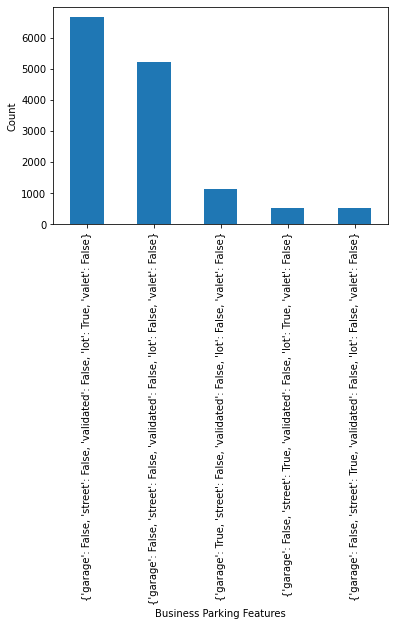

In [ ]:
df['BusinessParking'].value_counts()[0:5].plot(kind="bar", xlabel = 'Business Parking Features', ylabel = 'Count');

This indicates that businesses that offer a parking space/lot do much better than ones that do not.

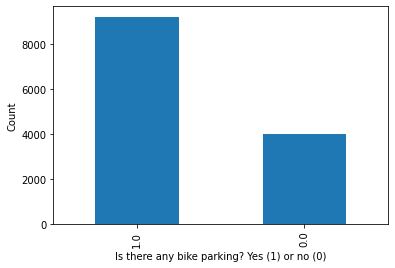

In [ ]:
df['BikeParking'].value_counts().plot(kind="bar", xlabel = 'Is there any bike parking? Yes (1) or no (0)', ylabel = 'Count');

The same applies for bicycle/motorbike parking.

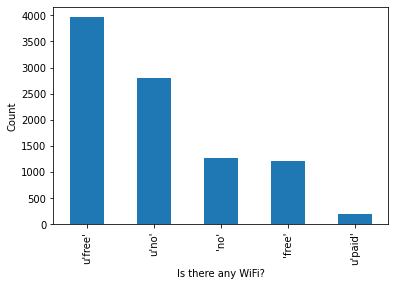

In [ ]:
df['WiFi'].value_counts()[0:5].plot(kind="bar", xlabel = 'Is there any WiFi?', ylabel = 'Count');

This is showing us that businesses that offer WiFi tend to do much better than businesses that do not. In particular, free WiFi.

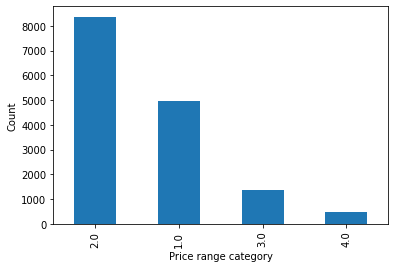

In [ ]:
df['RestaurantsPriceRange2'].value_counts().plot(kind="bar", xlabel = 'Price range category', ylabel = 'Count');

This shows us that restaurants in the 2nd price range (not too cheap, not too expensive) do better than others.

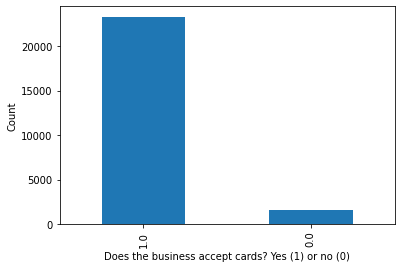

In [ ]:
df['BusinessAcceptsCreditCards'].value_counts().plot(kind="bar", xlabel = 'Does the business accept cards? Yes (1) or no (0)', ylabel = 'Count');

Accepting credit cards is a very big factor in making a business standout as most people find it inconvenient to carry cash around.

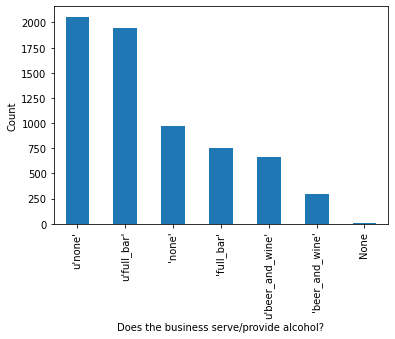

In [ ]:
df['Alcohol'].value_counts().plot(kind="bar", xlabel = 'Does the business serve/provide alcohol?', ylabel = 'Count');

This is an interesting one as it comes down to type of restaurant but here we see that businesses that offer alcohol and do not offer alcohol tend to do the same.

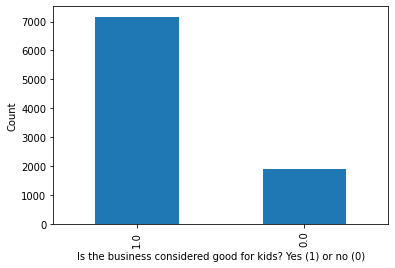

In [ ]:
df['GoodForKids'].value_counts().plot(kind="bar", xlabel = 'Is the business considered good for kids? Yes (1) or no (0)', ylabel = 'Count');

Here, we can see that businesses that are "Good for kids" standout. Being good for kids could mean having a nice, separate kids menu, having a play place, or providing perks such as crayons and toys to people under a certain age.

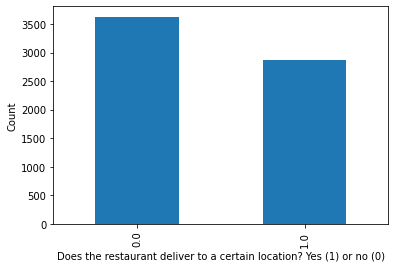

In [ ]:
df['RestaurantsDelivery'].value_counts().plot(kind="bar", xlabel = 'Does the restaurant deliver to a certain location? Yes (1) or no (0)', ylabel = 'Count');

This shows us that businesses that provide services for delivery tend to do almost the same as businesses that do not.

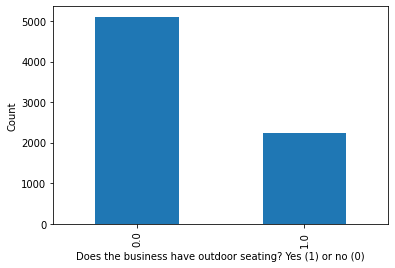

In [ ]:
df['OutdoorSeating'].value_counts().plot(kind="bar", xlabel = 'Does the business have outdoor seating? Yes (1) or no (0)', ylabel = 'Count');

Another surprising insight. Here we see that having outdoor seating doesn't really matter to people when reviewing businesses. We see that businesses without outdoor seating are faring better. By having outdoor seating, it could mean that the restaurant does not have any indoor seating, which could explain why there would be much fewer reviews.

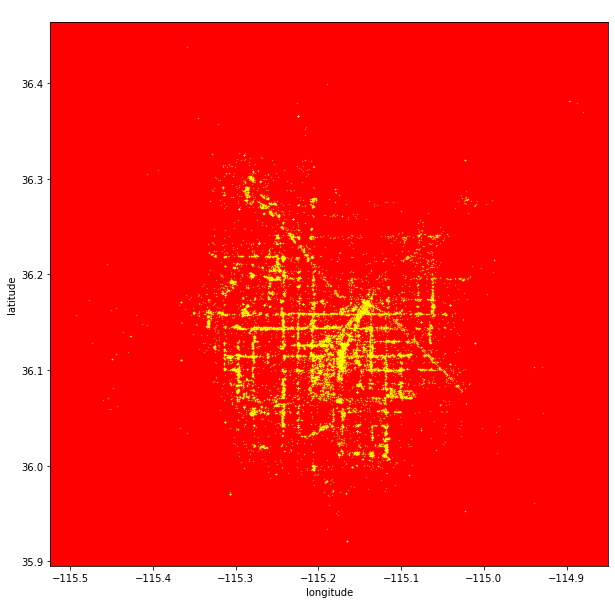

In [ ]:
# Heatmap
f, ax1 = plt.subplots(1, figsize=(10,10))

map = lv[['latitude','longitude']]

map.plot(kind='scatter', x='longitude', y='latitude', color='yellow', s=.05, alpha=1, subplots = True, ax=ax1)
ax1.set_title("Heatmap of the distribution of businesses in Las Vegas", color = 'white')
ax1.set_facecolor('red')

This heatmap is the most interesting part of this analysis since we can see the spread of the businesses in Las Vegas on a geographical heatmap of the whole city. What this indicates at the end of the day is that these businesses that are being reviewed and are being looked at by us aren't clustered in certain parts of the city or aren't skewed by some aspect like proximity/trend. It shows that these businesses are pretty evenly spread out throughout the city, which is a good, reaffirming sign for our analysis. 

Now let's repeat this for Toronto.

In [ ]:
tor.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,hours,Category A,Category B,Category C
9,EosRKXIGeSWFYWwpkbhNnA,Xtreme Couture,700 Kipling Avenue Etobicoke,Toronto,ON,M8Z 5G3,43.624539,-79.529108,3.0,16,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","{'Monday': '5:30-23:0', 'Tuesday': '5:30-23:0'...",Martial Arts,Gyms,Fitness & Instruction
26,1wWneWD_E1pBIyVpdHMaQg,Air Jordan Store,306 Yonge Street,Toronto,ON,M5B 1R4,43.656542,-79.381308,4.0,9,1,"{'RestaurantsPriceRange2': '3', 'BikeParking':...","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",Shopping,Shoe Stores,Fashion
29,007Dg4ESDVacWcC4Vq704Q,Front Door Organics,415 Horner Avenue,Toronto,ON,M8W 4W3,43.603232,-79.538424,4.0,8,0,"{'RestaurantsPriceRange2': '3', 'BikeParking':...","{'Monday': '9:0-16:0', 'Tuesday': '9:0-16:0', ...",Shopping,Food,Organic Stores
38,rVBPQdeayMYht4Uv_FOLHg,Gourmet Burger Company,843 Kipling Avenue,Toronto,ON,M8Z 5G9,43.633291,-79.531768,3.0,13,0,"{'RestaurantsPriceRange2': '2', 'RestaurantsAt...",None,Restaurants,Burgers,Food
52,9JCjKd6eFXsAMVwouTh_4Q,Bath and Body Works,1900 Eglintion Ave E,Toronto,ON,M1L 2L9,43.727189,-79.293008,3.5,7,1,"{'RestaurantsPriceRange2': '2', 'ByAppointment...",None,Cosmetics & Beauty Supply,Shopping,Beauty & Spas


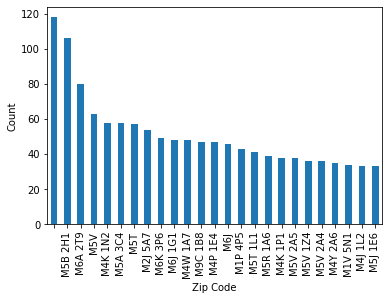

In [ ]:
# Are there any dominant zip codes?
tor['postal_code'].value_counts()[:25].plot(kind="bar", xlabel = 'Zip Code', ylabel = 'Count');

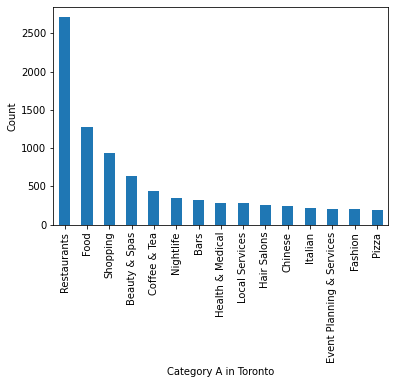

In [ ]:
tor['Category A'].value_counts()[:15].plot(kind="bar", xlabel = 'Category A in Toronto', ylabel = 'Count');

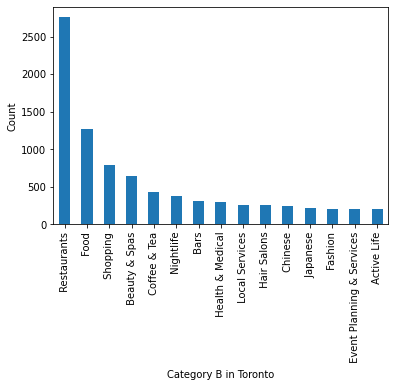

In [ ]:
tor['Category B'].value_counts()[:15].plot(kind="bar", xlabel = 'Category B in Toronto', ylabel = 'Count');

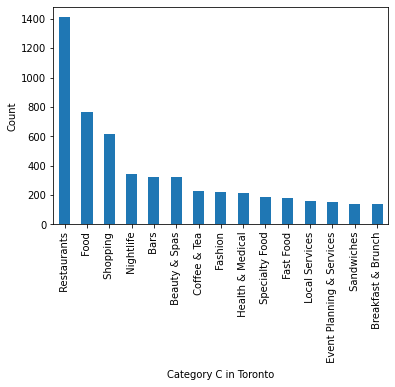

In [ ]:
tor['Category C'].value_counts()[:15].plot(kind="bar", xlabel = 'Category C in Toronto', ylabel = 'Count');

Again, we see that restaurants and food are most dominant.

In [ ]:
# Let's take a look at the businesses themselves now
tor[['name', 'review_count', 'stars']].sort_values(ascending=False, by="stars")[0:25]

,name,review_count,stars
209392,Kudlow Ye,3,5.0
118319,Noyzboyz Performance Exhaust,4,5.0
117060,Yi Therapy,4,5.0
117069,The Urban Athlete,3,5.0
117144,Avola College of Hairstyling & Esthetics,3,5.0
117186,Beauty Room,25,5.0
18865,Vivita,21,5.0
117225,Debe's Roti & Doubles,9,5.0
117245,44 Wide,6,5.0
117467,The Vegan Extremist,15,5.0


In [ ]:
tor[['name', 'review_count', 'stars', 'Category A', 'Category B', 'Category C']].sort_values(ascending=False, by="review_count")[0:10]

,name,review_count,stars,Category A,Category B,Category C
65694,Pai Northern Thai Kitchen,2758,4.5,Restaurants,Thai,Specialty Food
183740,KINKA IZAKAYA ORIGINAL,1592,4.0,Restaurants,Tapas/Small Plates,Japanese
143305,Khao San Road,1542,4.0,Thai,Restaurants,None
133959,Seven Lives Tacos Y Mariscos,1285,4.5,Restaurants,Seafood,Mexican
172038,Banh Mi Boys,1097,4.5,Sandwiches,Restaurants,Food
158023,Momofuku Noodle Bar,1010,3.0,Chinese,Soup,Ramen
170950,Uncle Tetsu's Japanese Cheesecake,1009,3.5,Bakeries,Food,Restaurants
89916,Bang Bang Ice Cream and Bakery,984,4.0,Food,Ice Cream & Frozen Yogurt,Desserts
97579,Gusto 101,956,4.0,Restaurants,Italian,None
27483,Salad King Restaurant,948,3.5,Thai,Restaurants,None


In [ ]:
# Now let's look at the attributes feature these top restaurants provide
tor[['name', 'attributes', 'review_count']].sort_values(ascending=False, by="review_count")[0:10]

,name,attributes,review_count
65694,Pai Northern Thai Kitchen,"{'RestaurantsTableService': 'True', 'BikeParki...",2758
183740,KINKA IZAKAYA ORIGINAL,"{'RestaurantsAttire': 'u'casual'', 'BusinessPa...",1592
143305,Khao San Road,"{'WiFi': 'u'no'', 'RestaurantsTakeOut': 'True'...",1542
133959,Seven Lives Tacos Y Mariscos,"{'RestaurantsGoodForGroups': 'False', 'Alcohol...",1285
172038,Banh Mi Boys,"{'Alcohol': 'u'none'', 'BikeParking': 'True', ...",1097
158023,Momofuku Noodle Bar,"{'BikeParking': 'True', 'WiFi': 'u'no'', 'Outd...",1010
170950,Uncle Tetsu's Japanese Cheesecake,"{'RestaurantsGoodForGroups': 'False', 'Alcohol...",1009
89916,Bang Bang Ice Cream and Bakery,"{'DogsAllowed': 'False', 'BikeParking': 'False...",984
97579,Gusto 101,"{'BikeParking': 'True', 'RestaurantsDelivery':...",956
27483,Salad King Restaurant,"{'HasTV': 'False', 'RestaurantsTakeOut': 'True...",948


All top 10 businesses in Toronto are restaurants/eateries.

In [ ]:
df = pd.concat([tor.drop(['attributes'], axis=1), tor['attributes'].apply(pd.Series)], axis=1)
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,hours,Category A,Category B,Category C,GoodForKids,ByAppointmentOnly,BusinessParking,BikeParking,RestaurantsPriceRange2,RestaurantsAttire,Alcohol,Caters,HasTV,RestaurantsGoodForGroups,RestaurantsTakeOut,RestaurantsDelivery,RestaurantsReservations,NoiseLevel,WiFi,Ambience,OutdoorSeating,GoodForMeal,RestaurantsTableService,WheelchairAccessible,AcceptsInsurance,DriveThru,DogsAllowed,Music,HappyHour,BestNights,GoodForDancing,CoatCheck,Smoking,HairSpecializesIn,BusinessAcceptsCreditCards,BYOB,Corkage,DietaryRestrictions,AgesAllowed,BusinessAcceptsBitcoin,RestaurantsCounterService
9,EosRKXIGeSWFYWwpkbhNnA,Xtreme Couture,700 Kipling Avenue Etobicoke,Toronto,ON,M8Z 5G3,43.624539,-79.529108,3.0,16,1,"{'Monday': '5:30-23:0', 'Tuesday': '5:30-23:0'...",Martial Arts,Gyms,Fitness & Instruction,True,True,"{'garage': False, 'street': False, 'validated'...",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,1wWneWD_E1pBIyVpdHMaQg,Air Jordan Store,306 Yonge Street,Toronto,ON,M5B 1R4,43.656542,-79.381308,4.0,9,1,"{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",Shopping,Shoe Stores,Fashion,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",True,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,007Dg4ESDVacWcC4Vq704Q,Front Door Organics,415 Horner Avenue,Toronto,ON,M8W 4W3,43.603232,-79.538424,4.0,8,0,"{'Monday': '9:0-16:0', 'Tuesday': '9:0-16:0', ...",Shopping,Food,Organic Stores,NaN,NaN,NaN,False,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,rVBPQdeayMYht4Uv_FOLHg,Gourmet Burger Company,843 Kipling Avenue,Toronto,ON,M8Z 5G9,43.633291,-79.531768,3.0,13,0,None,Restaurants,Burgers,Food,True,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,2,u'casual',u'none',False,False,True,True,False,False,u'average','no',"{'romantic': False, 'intimate': False, 'classy...",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,9JCjKd6eFXsAMVwouTh_4Q,Bath and Body Works,1900 Eglintion Ave E,Toronto,ON,M1L 2L9,43.727189,-79.293008,3.5,7,1,None,Cosmetics & Beauty Supply,Shopping,Beauty & Spas,NaN,False,"{'garage': False, 'street': False, 'validated'...",NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


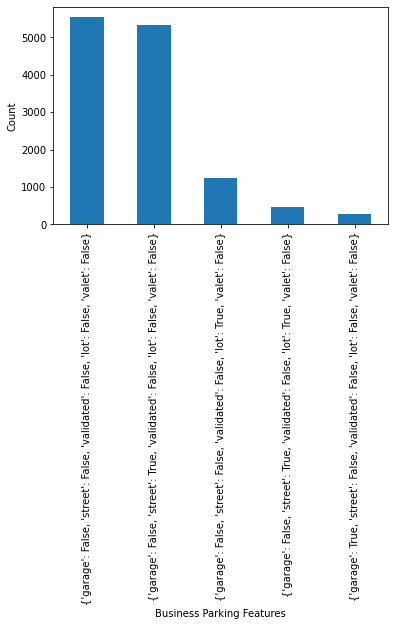

In [ ]:
df2['BusinessParking'].value_counts()[0:5].plot(kind="bar", xlabel = 'Business Parking Features', ylabel = 'Count');

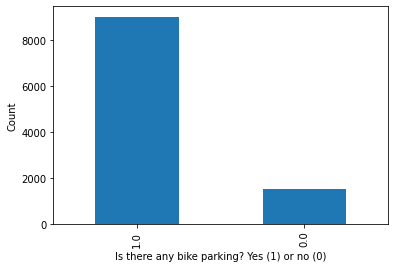

In [ ]:
df2['BikeParking'].value_counts().plot(kind="bar", xlabel = 'Is there any bike parking? Yes (1) or no (0)', ylabel = 'Count');

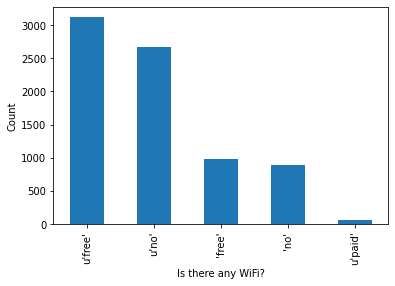

In [ ]:
df2['WiFi'].value_counts()[0:5].plot(kind="bar", xlabel = 'Is there any WiFi?', ylabel = 'Count');

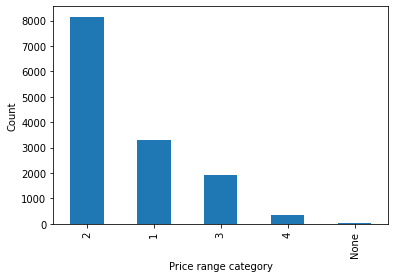

In [ ]:
df2['RestaurantsPriceRange2'].value_counts().plot(kind="bar", xlabel = 'Price range category', ylabel = 'Count');

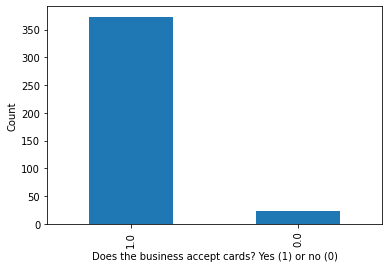

In [ ]:
df2['BusinessAcceptsCreditCards'].value_counts().plot(kind="bar", xlabel = 'Does the business accept cards? Yes (1) or no (0)', ylabel = 'Count');

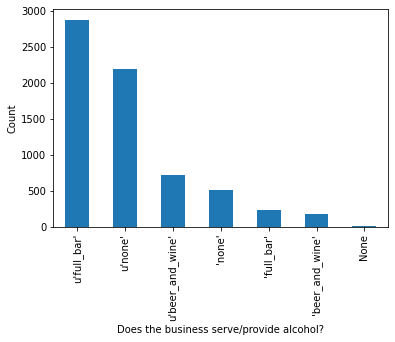

In [ ]:
df2['Alcohol'].value_counts().plot(kind="bar", xlabel = 'Does the business serve/provide alcohol?', ylabel = 'Count');

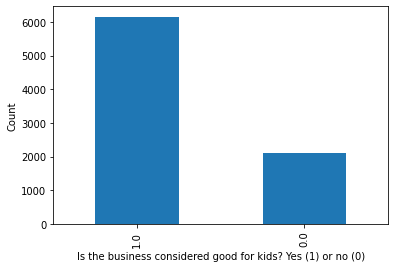

In [ ]:
df2['GoodForKids'].value_counts().plot(kind="bar", xlabel = 'Is the business considered good for kids? Yes (1) or no (0)', ylabel = 'Count');

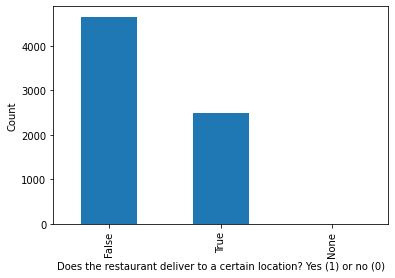

In [ ]:
df2['RestaurantsDelivery'].value_counts().plot(kind="bar", xlabel = 'Does the restaurant deliver to a certain location? Yes (1) or no (0)', ylabel = 'Count');

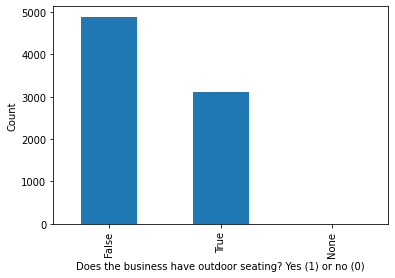

In [ ]:
df2['OutdoorSeating'].value_counts().plot(kind="bar", xlabel = 'Does the business have outdoor seating? Yes (1) or no (0)', ylabel = 'Count');

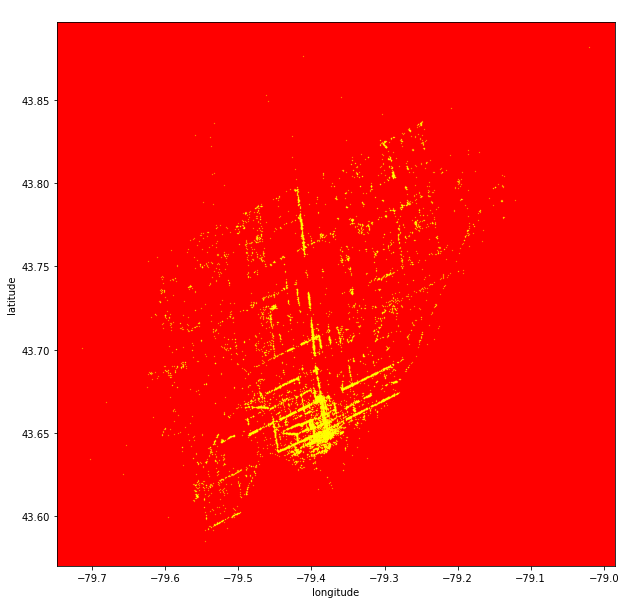

In [ ]:
# Heatmap
f, ax1 = plt.subplots(1, figsize=(10,10))

map = tor[['latitude','longitude']]

map.plot(kind='scatter', x='longitude', y='latitude', color='yellow', s=.05, alpha=1, subplots = True, ax=ax1)
ax1.set_title("Heatmap of the distribution of businesses in Toronto", color = 'white')
ax1.set_facecolor('red')

While we can see that Toronto's reviewed business aren't as spread out as Las Vegas, there's still a decent distribution in a very large, very populated city which would suggest that factors that make a good/highly rated business are universal rather than geographic/trend specific.

Now, we repeat this again but for Phoenix

In [ ]:
phx.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,hours,Category A,Category B,Category C
28,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,16223 N Cave Creek Rd,Phoenix,AZ,85032,33.633689,-112.030435,4.5,17,1,{'BusinessAcceptsCreditCards': 'True'},"{'Monday': '7:30-17:0', 'Tuesday': '9:0-17:0',...",Automotive,Auto Repair,None
33,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",Food,Pretzels,Bakeries
37,kHCTmEekJJwYsJEy7xYM5w,Banner - University Family Medicine Center,"1300 N 12th St, Ste 605",Phoenix,AZ,85006,33.462841,-112.057232,3.0,3,1,"{'ByAppointmentOnly': 'True', 'AcceptsInsuranc...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",Doctors,Health & Medical,Preventive Medicine
53,Mmd5WDFq9hHcQ3uClngGjQ,Irene's Tap Room,1227 E Northern Ave,Phoenix,AZ,85020,33.552790,-112.055400,4.5,79,1,"{'WiFi': 'u'free'', 'NoiseLevel': 'u'average''...","{'Monday': '0:0-0:0', 'Tuesday': '15:0-0:0', '...",Bars,Arts & Entertainment,Nightlife
56,YFsb1ydMxFLrxtJ3CffVhw,LA Fitness,7640 W Thomas Rd,Phoenix,AZ,85033,33.481551,-112.223225,2.5,32,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","{'Monday': '8:0-16:0', 'Tuesday': '5:0-22:0', ...",Yoga,Active Life,Trainers


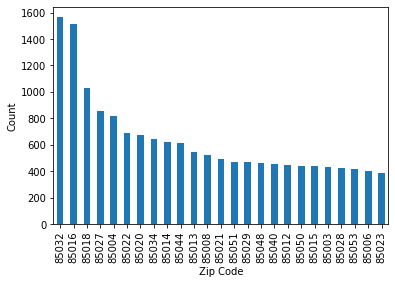

In [ ]:
# Are there any dominant zip codes?
phx['postal_code'].value_counts()[:25].plot(kind="bar", xlabel = 'Zip Code', ylabel = 'Count');

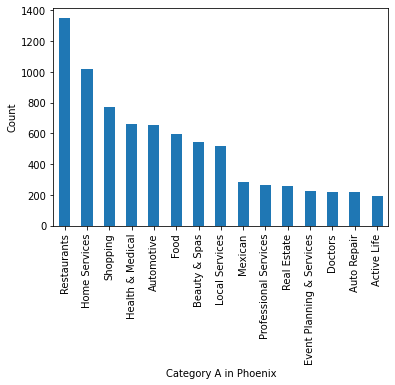

In [ ]:
phx['Category A'].value_counts()[:15].plot(kind="bar", xlabel = 'Category A in Phoenix', ylabel = 'Count');

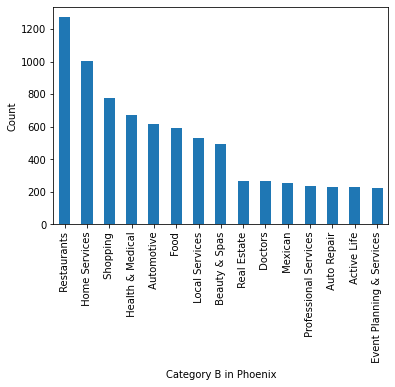

In [ ]:
phx['Category B'].value_counts()[:15].plot(kind="bar", xlabel = 'Category B in Phoenix', ylabel = 'Count');

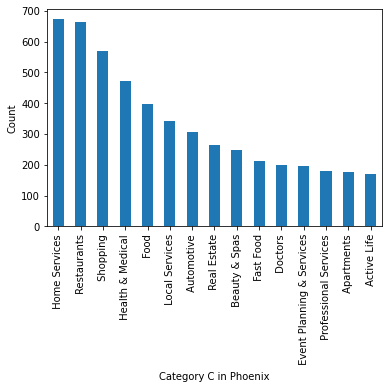

In [ ]:
phx['Category C'].value_counts()[:15].plot(kind="bar", xlabel = 'Category C in Phoenix', ylabel = 'Count');

This is quite interesting to see. Restaurants are dominant again but less dominant as compared to the numbers in Las Vegas and Toronto. We can even see, in Category C, that home services edges out in front of restaurants.

In [ ]:
# Let's take a look at the businesses themselves now
phx[['name', 'review_count', 'stars']].sort_values(ascending=False, by="stars")[0:25]

,name,review_count,stars
189360,Thomas Bishop Automotive,7,5.0
185129,Professional Movers,6,5.0
79435,Walter Yoga,6,5.0
32574,Funkatronic Rex - Games & More,8,5.0
32585,Distinct Detail,4,5.0
148955,Smoke Zone Beer & Wine,6,5.0
148972,United Aluminum,4,5.0
185211,Johnnie's Java Mobile Coffee Catering,3,5.0
149013,Relaxation4All,12,5.0
32700,Global Travel,16,5.0


In [ ]:
phx[['name', 'review_count', 'stars', 'Category A', 'Category B', 'Category C']].sort_values(ascending=False, by="review_count")[0:10]

,name,review_count,stars,Category A,Category B,Category C
207685,"Snooze, An A.M. Eatery",3515,4.0,Breakfast & Brunch,Coffee & Tea,Sandwiches
171190,Bobby Q,3302,4.5,Barbeque,Caterers,Event Planning & Services
111473,Phoenix Sky Harbor International Airport,2810,3.5,Airports,Hotels & Travel,None
151899,Pizzeria Bianco,2527,4.0,Sandwiches,Tapas/Small Plates,Restaurants
10824,The Arrogant Butcher,2358,4.0,American (New),Gastropubs,Seafood
141155,Little Miss BBQ,2329,5.0,Barbeque,Restaurants,None
128439,Lux Central,2210,4.0,Nightlife,American (New),Bakeries
91888,Cibo,2164,4.5,Restaurants,Sandwiches,Italian
174032,La Santisima Gourmet Taco Shop,2152,4.0,Cafes,New Mexican Cuisine,Nightlife
152786,Lo-Lo's Chicken & Waffles,2102,4.0,Soul Food,Southern,Restaurants


In [ ]:
# Now let's look at the attributes feature these top restaurants provide
phx[['name', 'attributes', 'review_count']].sort_values(ascending=False, by="review_count")[0:10]

,name,attributes,review_count
207685,"Snooze, An A.M. Eatery","{'RestaurantsPriceRange2': '2', 'RestaurantsGo...",3515
171190,Bobby Q,"{'WiFi': 'u'free'', 'RestaurantsPriceRange2': ...",3302
111473,Phoenix Sky Harbor International Airport,"{'WiFi': 'u'free'', 'ByAppointmentOnly': 'False'}",2810
151899,Pizzeria Bianco,"{'Alcohol': ''beer_and_wine'', 'BusinessAccept...",2527
10824,The Arrogant Butcher,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",2358
141155,Little Miss BBQ,"{'RestaurantsDelivery': 'False', 'RestaurantsA...",2329
128439,Lux Central,"{'RestaurantsAttire': 'u'casual'', 'OutdoorSea...",2210
91888,Cibo,"{'Alcohol': ''beer_and_wine'', 'Corkage': 'Fal...",2164
174032,La Santisima Gourmet Taco Shop,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...",2152
152786,Lo-Lo's Chicken & Waffles,"{'RestaurantsTakeOut': 'True', 'Corkage': 'Fal...",2102


In [ ]:
df = pd.concat([phx.drop(['attributes'], axis=1), phx['attributes'].apply(pd.Series)], axis=1)
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,hours,Category A,Category B,Category C,BusinessAcceptsCreditCards,GoodForKids,RestaurantsTakeOut,RestaurantsPriceRange2,OutdoorSeating,BikeParking,RestaurantsAttire,RestaurantsReservations,Ambience,RestaurantsGoodForGroups,Alcohol,RestaurantsDelivery,HasTV,BusinessParking,ByAppointmentOnly,AcceptsInsurance,WiFi,NoiseLevel,GoodForDancing,HappyHour,CoatCheck,DogsAllowed,BestNights,BusinessAcceptsBitcoin,Music,WheelchairAccessible,Smoking,Caters,GoodForMeal,RestaurantsTableService,DriveThru,Corkage,BYOB,HairSpecializesIn,BYOBCorkage,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,Open24Hours
28,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,16223 N Cave Creek Rd,Phoenix,AZ,85032,33.633689,-112.030435,4.5,17,1,"{'Monday': '7:30-17:0', 'Tuesday': '9:0-17:0',...",Automotive,Auto Repair,None,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,1,"{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",Food,Pretzels,Bakeries,True,True,True,1,False,True,u'casual',False,"{'romantic': False, 'intimate': False, 'touris...",True,u'none',False,False,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,kHCTmEekJJwYsJEy7xYM5w,Banner - University Family Medicine Center,"1300 N 12th St, Ste 605",Phoenix,AZ,85006,33.462841,-112.057232,3.0,3,1,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",Doctors,Health & Medical,Preventive Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,Mmd5WDFq9hHcQ3uClngGjQ,Irene's Tap Room,1227 E Northern Ave,Phoenix,AZ,85020,33.552790,-112.055400,4.5,79,1,"{'Monday': '0:0-0:0', 'Tuesday': '15:0-0:0', '...",Bars,Arts & Entertainment,Nightlife,True,False,NaN,NaN,False,False,u'casual',False,"{'touristy': None, 'hipster': None, 'romantic'...",True,u'beer_and_wine',NaN,True,"{'garage': False, 'street': False, 'validated'...",False,NaN,u'free',u'average',False,True,False,False,"{'monday': False, 'tuesday': True, 'friday': T...",False,"{'dj': False, 'background_music': False, 'no_m...",True,u'outdoor',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,YFsb1ydMxFLrxtJ3CffVhw,LA Fitness,7640 W Thomas Rd,Phoenix,AZ,85033,33.481551,-112.223225,2.5,32,1,"{'Monday': '8:0-16:0', 'Tuesday': '5:0-22:0', ...",Yoga,Active Life,Trainers,True,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


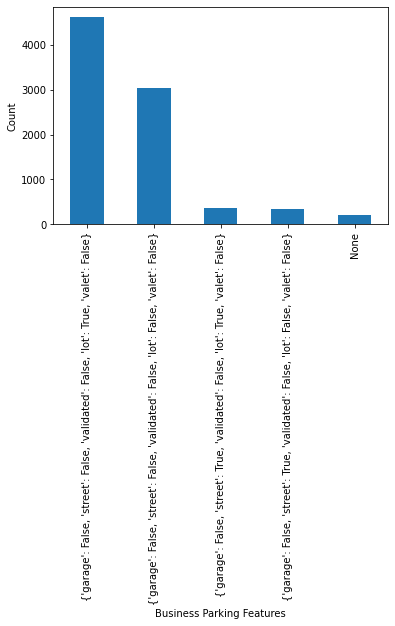

In [ ]:
df['BusinessParking'].value_counts()[0:5].plot(kind="bar", xlabel = 'Business Parking Features', ylabel = 'Count');

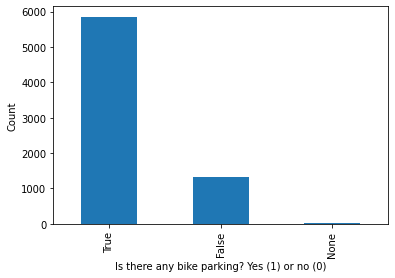

In [ ]:
df['BikeParking'].value_counts().plot(kind="bar", xlabel = 'Is there any bike parking? Yes (1) or no (0)', ylabel = 'Count');

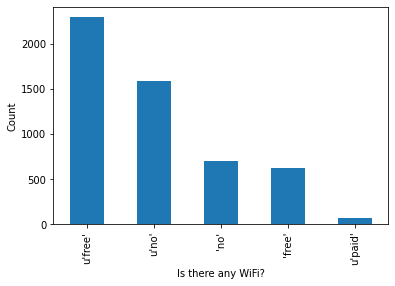

In [ ]:
df['WiFi'].value_counts()[0:5].plot(kind="bar", xlabel = 'Is there any WiFi?', ylabel = 'Count');

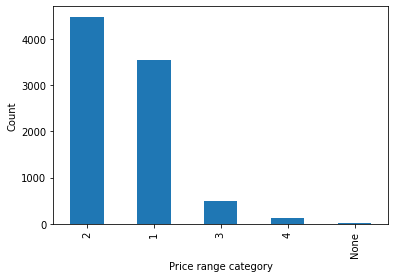

In [ ]:
df['RestaurantsPriceRange2'].value_counts().plot(kind="bar", xlabel = 'Price range category', ylabel = 'Count');

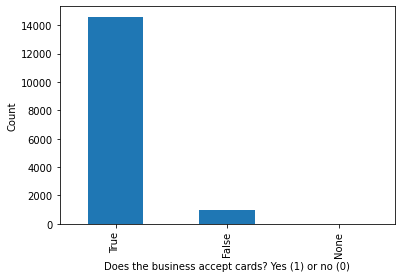

In [ ]:
df['BusinessAcceptsCreditCards'].value_counts().plot(kind="bar", xlabel = 'Does the business accept cards? Yes (1) or no (0)', ylabel = 'Count');

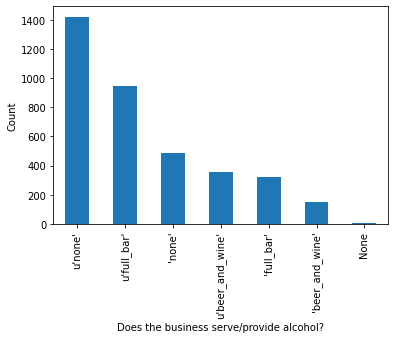

In [ ]:
df['Alcohol'].value_counts().plot(kind="bar", xlabel = 'Does the business serve/provide alcohol?', ylabel = 'Count');

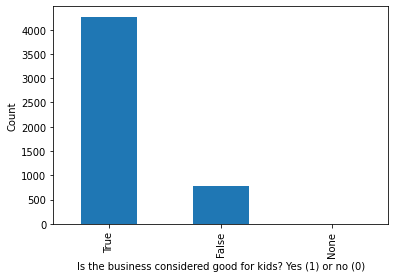

In [ ]:
df['GoodForKids'].value_counts().plot(kind="bar", xlabel = 'Is the business considered good for kids? Yes (1) or no (0)', ylabel = 'Count');

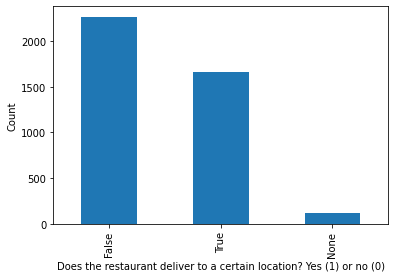

In [ ]:
df['RestaurantsDelivery'].value_counts().plot(kind="bar", xlabel = 'Does the restaurant deliver to a certain location? Yes (1) or no (0)', ylabel = 'Count');

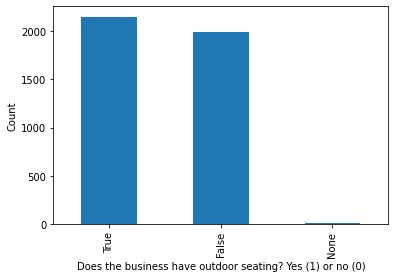

In [ ]:
df['OutdoorSeating'].value_counts().plot(kind="bar", xlabel = 'Does the business have outdoor seating? Yes (1) or no (0)', ylabel = 'Count');

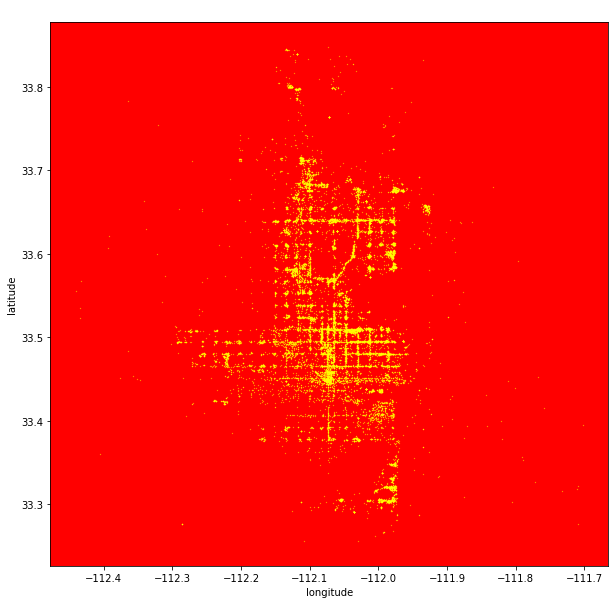

In [ ]:
# Heatmap
f, ax1 = plt.subplots(1, figsize=(10,10))

map = phx[['latitude','longitude']]

map.plot(kind='scatter', x='longitude', y='latitude', color='yellow', s=.05, alpha=1, subplots = True, ax=ax1)
ax1.set_title("Heatmap of the distribution of businesses in Phoenix", color = 'white')
ax1.set_facecolor('red')

Almost as distributed as Las Vegas, which isn't surprisingly because they are relatively close to each other and almost at the same level of development/standard of life.

So from the two additional analyses done on Toronto and Phoenix, we can make a few conclusions.

In the case of Toronto we can see that most customers valued and reviewed top businesses to be the ones where there was space to park, where it didn't really matter if WiFi was offered or not, where the price range category was 2, where it didn't really matter if alcohol was offered or not, where credit cards were accepted, which was good for kids, which didn't deliver to specific location, and which didn't have outdoor seating.

From Phoenix, we can see significant overlaps where customers valued top businesses as the ones where parking and WiFi was offered, where the price range was 2 and 1, cards were accepted, delivery services weren't offered, alcohol wasn't served, where it was considered good for kids, and where it didn't really matter whether there was outdoor seating or not.

In [ ]:
business2 = business.loc[(business['Category A'] == 'Restaurants') | (business['Category B'] == 'Restaurants') | (business['Category C'] == 'Restaurants')]
business2.drop(['attributes', 'hours'], axis = 1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,Category A,Category B,Category C
24,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,1,Restaurants,Cheesesteaks,Poutineries
38,rVBPQdeayMYht4Uv_FOLHg,Gourmet Burger Company,843 Kipling Avenue,Toronto,ON,M8Z 5G9,43.633291,-79.531768,3.0,13,0,Restaurants,Burgers,Food
41,98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,Restaurants,Vietnamese,Soup
43,LoRef3ChgZKbxUio-sHgQg,Amir,5252 Rue Jean Talon O,Montréal,QC,H4P 2A7,45.494870,-73.651904,3.0,18,1,Restaurants,Lebanese,Middle Eastern
49,tLpkSwdtqqoXwU0JAGnApw,Wendy's,4602 Northfield Road,Cleveland,OH,44128,41.434614,-81.527026,3.5,7,1,Restaurants,Fast Food,Burgers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209343,8dK-8e006F_it5bNxTVlaQ,Famous Dave's Bar-B-Que,26410 Great Northern Shopping Ctr,North Olmsted,OH,44070,41.418407,-81.915597,3.5,120,1,Restaurants,Barbeque,Comfort Food
209359,GAgEoHcf4PSuZRS5Zd3ltA,Q's Shawarma,1075 Martin Grove Road,Toronto,ON,M9W 4W6,43.701807,-79.575135,4.0,16,1,Restaurants,Mediterranean,None
209372,wjZ12shpUWAy4Boy0G5z1g,Island Buffet,"Tropicana Resort and Casino, 3801 Las Vegas Bl...",Las Vegas,NV,89109,36.099378,-115.171029,1.5,9,0,Restaurants,Buffets,None
209383,BAVuLTDmpSzDCk37A5HjtQ,Bruegger's Bagels,27045 Lorain Rd,North Olmsted,OH,44070,41.416568,-81.921396,3.0,13,0,Restaurants,Sandwiches,Food


We can also analyse how the attributes of different businesses affect their success on Yelp on a wider scale. First let us reload the business dataset.

In [ ]:
 business = pd.read_json(wd + "yelp_academic_dataset_business.json", lines=True)
 business

Before we can look at these attributes to see how they relate to success on yelp, we have to change the data in the attributes column from the default type(dictionary) to a series of columns in the dataframe to make it easier to work with.

In [ ]:
df = pd.concat([business.drop(['attributes'], axis=1), business['attributes'].apply(pd.Series)], axis=1)
df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,hours,BusinessAcceptsCreditCards,BikeParking,GoodForKids,BusinessParking,ByAppointmentOnly,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsAttire,RestaurantsTakeOut,NoiseLevel,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,Alcohol,RestaurantsDelivery,OutdoorSeating,Caters,WheelchairAccessible,AcceptsInsurance,RestaurantsTableService,Ambience,GoodForMeal,HappyHour,BusinessAcceptsBitcoin,BYOB,Corkage,GoodForDancing,CoatCheck,BestNights,Music,Smoking,DietaryRestrictions,DriveThru,HairSpecializesIn,BYOBCorkage,AgesAllowed,RestaurantsCounterService,Open24Hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",True,True,False,"{'garage': False, 'street': False, 'validated'...",False,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"Health & Medical, Fitness & Instruction, Yoga,...",None,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,"Pets, Pet Services, Pet Groomers",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...",True,True,NaN,"{'garage': False, 'street': False, 'validated'...",False,4,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...",True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209388,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,9750 Weston Road,Vaughan,ON,L4H 2P2,43.838555,-79.559823,4.0,5,0,"Japanese, Sushi Bars, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",NaN,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,2,NaN,'free',u'casual',True,u'quiet',True,True,False,u'beer_and_wine',False,False,NaN,NaN,NaN,NaN,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209389,PotiAhtDMYMNsJCzV0oLAw,Walmart,3240 Wilkinson Blvd,Charlotte,NC,28208,35.226307,-80.893539,2.0,13,0,"Department Stores, Food, Mobile Phones, Fashio...",None,True,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209390,SYa2j1boLF8DcGVOYfHPcA,Five Guys,7014-590 E Camelback Rd,Scottsdale,AZ,85251,33.504062,-111.929431,3.5,97,1,"American (New), Food, Burgers, Restaurants, Fa...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",True,True,True,"{'garage': False, 'street': False, 'validated'...",NaN,2,NaN,u'no',u'casual',True,u'average',False,True,False,u'none',False,True,False,NaN,NaN,NaN,"{'romantic

Next, we change all boolean attributes to 0's (False) and 1's (True). We also change all the numerical attributes to int's because they are initialized as strings.

In [ ]:
columns = ["BusinessAcceptsCreditCards",	"BikeParking",	"GoodForKids",	"ByAppointmentOnly",	"RestaurantsPriceRange2",	"DogsAllowed", "RestaurantsTakeOut", "RestaurantsReservations",	"RestaurantsGoodForGroups",	"HasTV",	"RestaurantsDelivery",	"OutdoorSeating",	"Caters",	"WheelchairAccessible",	"AcceptsInsurance",	"RestaurantsTableService",	"HappyHour",	"BusinessAcceptsBitcoin",	"BYOB",	"Corkage",	"GoodForDancing",	"CoatCheck", "DriveThru",	"RestaurantsCounterService",	"Open24Hours"]
for col in columns:
  df[col].replace({"True": 1, "False": 0, "None" : None,"0" : 0 ,"1" : 1 ,"2" : 2 ,"3" : 3 ,"4" : 4 ,"5" : 5 ,"6" : 6 ,"7" : 7 ,"8" : 8, "9" : 9}, inplace=True)
df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,hours,BusinessAcceptsCreditCards,BikeParking,GoodForKids,BusinessParking,ByAppointmentOnly,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsAttire,RestaurantsTakeOut,NoiseLevel,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,Alcohol,RestaurantsDelivery,OutdoorSeating,Caters,WheelchairAccessible,AcceptsInsurance,RestaurantsTableService,Ambience,GoodForMeal,HappyHour,BusinessAcceptsBitcoin,BYOB,Corkage,GoodForDancing,CoatCheck,BestNights,Music,Smoking,DietaryRestrictions,DriveThru,HairSpecializesIn,BYOBCorkage,AgesAllowed,RestaurantsCounterService,Open24Hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",1.0,1.0,0.0,"{'garage': False, 'street': False, 'validated'...",0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"Health & Medical, Fitness & Instruction, Yoga,...",None,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,"Pets, Pet Services, Pet Groomers",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...",1.0,1.0,NaN,"{'garage': False, 'street': False, 'validated'...",0.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...",1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209388,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,9750 Weston Road,Vaughan,ON,L4H 2P2,43.838555,-79.559823,4.0,5,0,"Japanese, Sushi Bars, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",NaN,NaN,1.0,"{'garage': False, 'street': False, 'validated'...",NaN,2.0,NaN,'free',u'casual',1.0,u'quiet',1.0,1.0,0.0,u'beer_and_wine',0.0,0.0,NaN,NaN,NaN,NaN,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209389,PotiAhtDMYMNsJCzV0oLAw,Walmart,3240 Wilkinson Blvd,Charlotte,NC,28208,35.226307,-80.893539,2.0,13,0,"Department Stores, Food, Mobile Phones, Fashio...",None,1.0,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209390,SYa2j1boLF8DcGVOYfHPcA,Five Guys,7014-590 E Camelback Rd,Scottsdale,AZ,85251,33.504062,-111.929431,3.5,97,1,"American (New), Food, Burgers, Restaurants, Fa...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1.0,1.0,1.0,"{'garage': False, 'street': False, 'validated'...",NaN,2.0,NaN,u'no',u'casual',1.0,u'average',0.0,1.0,0.0,u'none',0.0,1.0,0.0,NaN,NaN,NaN,"{'romantic': False, 'intimate': False, '

We can now create a series of heatmaps comparing the rating of a business and the number of reviews it has recieved to the attributes.

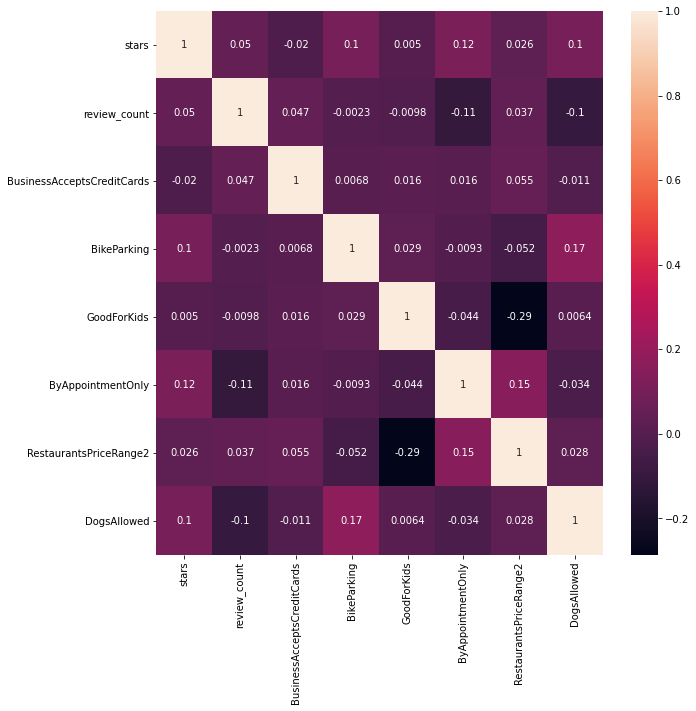

In [ ]:
labels = ["stars", "review_count", "BusinessAcceptsCreditCards","BikeParking",	"GoodForKids",	"ByAppointmentOnly",	"RestaurantsPriceRange2",	"DogsAllowed",]
x = df.loc[:,labels]
l = x.corr()
fig = plt.figure(figsize=(10, 10))
sn.heatmap(l, annot=True, xticklabels= labels, yticklabels= labels)

We are most interested in the first two columns which show how different attributes correlate to stars and reviews on yelp. Users show a slight preference for businesses which have bike parking, are apointment only, and allow dogs although they dont give as many reviews to businesses with the later two. For apointment only businesses, this could be explained by some high end restaurants forbidding customers from taking images of the food or posting reviews. The correlation with allowing dogs is less clear and as it is small, it could be insignificant.

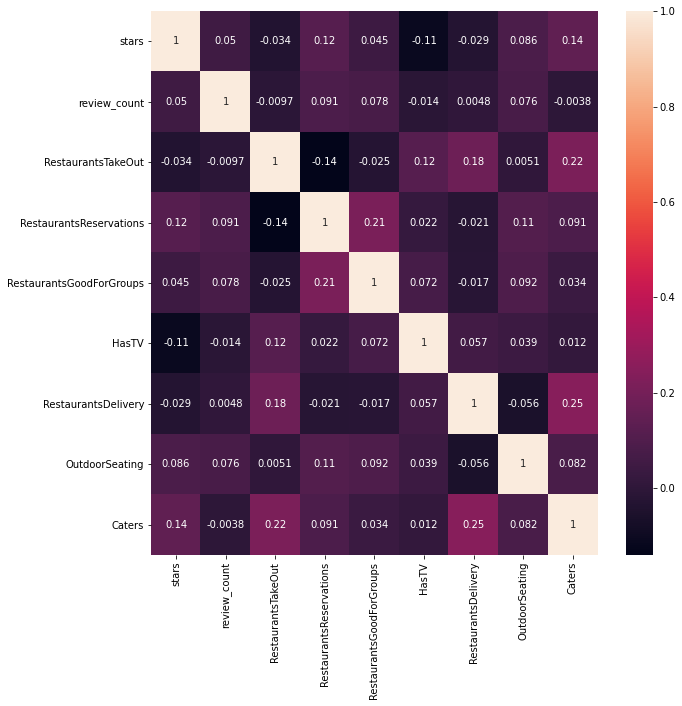

In [ ]:
labels = ["stars", "review_count", "RestaurantsTakeOut", "RestaurantsReservations",	"RestaurantsGoodForGroups",	"HasTV",	"RestaurantsDelivery",	"OutdoorSeating", "Caters"]
x = df.loc[:,labels]
l = x.corr()
fig = plt.figure(figsize=(10, 10))
sn.heatmap(l, annot=True, xticklabels= labels, yticklabels= labels)

From the second set of attributes, we see that people seem to slightly dislike businesses with TV's. This could be because a lot of these businesses are fast food restaurants and customers may perceive them as not being very high quality. We can also see that people prefer businesses with catering and reservations which agrees with our prevoius finding that customers prefer higher-end dining locations. The option of catering and reservations makes customers feel as if they are valued - catering offers personalized service whereas reservations give the message that no-one will be given their seat in the restaurant if they have made a booking. Because these are "feel-good" measures on the part of the business, customers feel more connected to them and develop a relationship with these businesses, leading to higher ratings and reviews.

To extend this analysis, one more thing we could point regarding TVs is that since most of the businesses on Yelp are restaurants, having a TV on inside would be counter-intuitive to the purpose of people leaving home and choosing to eat in restaurant. Because everyone is busy, families don't really get the time to sit down with no technology and spend some quality time together. If most of the businesses we have looked at are restaurants, then it makes logical sense that the ones without TVs are valued because they force families to pay attention to each other and spend the quality time with each other that they desire.

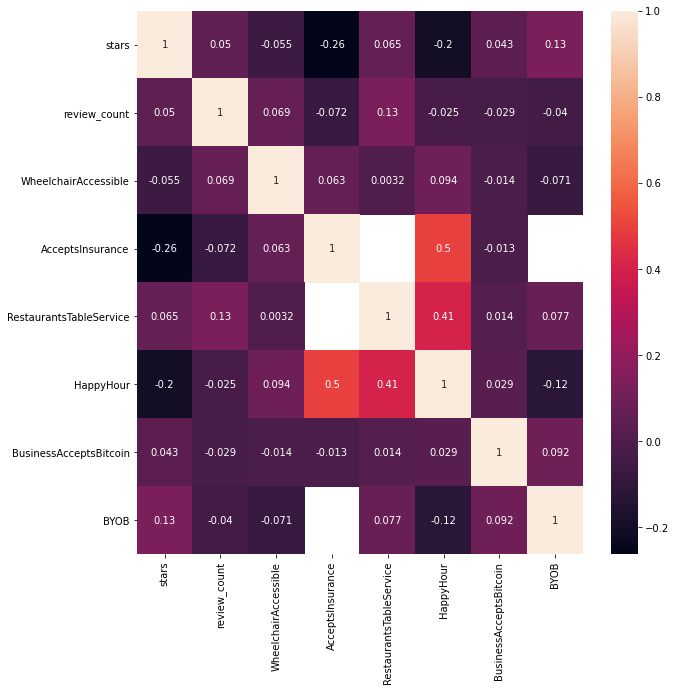

In [ ]:
labels = ["stars", "review_count",	"WheelchairAccessible",	"AcceptsInsurance",	"RestaurantsTableService",	"HappyHour",	"BusinessAcceptsBitcoin", "BYOB"]
x = df.loc[:,labels]
l = x.corr()
fig = plt.figure(figsize=(10, 10))
sn.heatmap(l, annot=True, xticklabels= labels, yticklabels= labels)

From these set of attributes, we can see that customers don't like businesses which accept insurance or have happy hours. This is unexpected as we thought these conveniences would increase the perception of businesses but that is not the case.

Customers also prefer businesses with a BYOB option and they give more reviews for restaurants with table service. This could be because sitting down at a restaurant may make people more likely to write up a quick review of the establishment as opposed to being served at a counter or using a drive through. By offering table service, restaurants are allowing customers to come in, sit wherever they want, absorb the atmosphere around them, take their surroundings in, and really be at peace wherever they choose to eat. This association with their surroundings is key for developing personal bonds with customers and turn them into recurring customers. This is naturally likely to lead to more reviews and a higher rating.

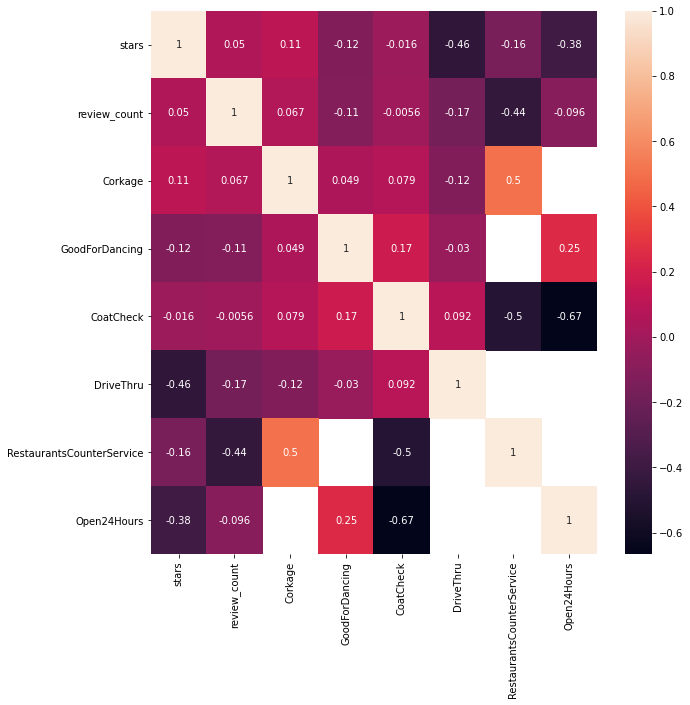

In [ ]:
labels = ["stars", "review_count",	"Corkage",	"GoodForDancing",	"CoatCheck", "DriveThru",	"RestaurantsCounterService",	"Open24Hours"]
x = df.loc[:,labels]
l = x.corr()
fig = plt.figure(figsize=(10, 10))
sn.heatmap(l, annot=True, xticklabels= labels, yticklabels= labels)

The last set of attributes has the most significant correlations. Custometrs show a slight preference for businesses with corkage and a slight dislike for businesses with counter service and ones that are good for dancing. There is also a strong negative correlation between the likes a business gets on yelp and it being open 24 hours or having a drive through option. Similar to our findings above, these features make the business more accesible but they are usually found in low quality fast food restaurants. As a result, they usually recieve low ratings. We can also see that customers are less likely to review businesses with counter service and drive thru which agrees with our finding that sitting at a location may increase customers likeliness to leave a review.

## From the Customers Perspective

In order to examine engagement with yelp reviews, it was important to compline all interactions with the review into one variable. We justified this choice because any interaction, regardless of category, helped to measure engagement. We used this variable in conjunction with other variables of interest to create visualizations. 

In [ ]:
#import user data 
import json
with open(wd + "/yelp_academic_dataset_user.json") as json_file:      
    ur = json_file.readlines()
    ur = list(map(json.loads, ur)) 

ur = pd.DataFrame(ur)
ur

In [ ]:
#creating a total compliment varible
sum_column = ur["compliment_hot"] + ur["compliment_more"] + ur["compliment_profile"] + ur["compliment_cute"] + ur["compliment_list"] + ur["compliment_note"] + ur["compliment_plain"] + ur["compliment_cool"] + ur["compliment_funny"] + ur["compliment_writer"] + ur["compliment_photos"] 
ur["compliment_sum"] = sum_column
ur

In [ ]:
#import tip
import json
with open(wd + "/yelp_academic_dataset_tip.json") as json_file:      
    tip = json_file.readlines()
    tip = list(map(json.loads, tip)) 

tip = pd.DataFrame(tip)
tip

In [ ]:
#import business
import json
with open(wd + "/yelp_academic_dataset_business.json") as json_file:      
    bsns = json_file.readlines()
    bsns = list(map(json.loads, bsns)) 

bsns = pd.DataFrame(bsns)
bsns

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209388,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,9750 Weston Road,Vaughan,ON,L4H 2P2,43.838555,-79.559823,4.0,5,0,"{'Ambience': '{'romantic': False, 'intimate': ...","Japanese, Sushi Bars, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
209389,PotiAhtDMYMNsJCzV0oLAw,Walmart,3240 Wilkinson Blvd,Charlotte,NC,28208,35.226307,-80.893539,2.0,13,0,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Department Stores, Food, Mobile Phones, Fashio...",None
209390,SYa2j1boLF8DcGVOYfHPcA,Five Guys,7014-590 E Camelback Rd,Scottsdale,AZ,85251,33.504062,-111.929431,3.5,97,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","American (New), Food, Burgers, Restaurants, Fa...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
209391,RSSIsgO00OuWQTRoITacpA,Indian Trail Dog Training,,Indian Trail,NC,28079,35.101965,-80.599385,5.0,3,1,None,"Pet Services, Pet Training, Pets","{'Monday': '0:0-0:0', 'Tuesday': '7:0-19:0', '..."


In [ ]:
wordtrack = tip['text'].value_counts()
wordtrack

Love this place!                                                                                761
Great food                                                                                      736
Love this place                                                                                 699
Yum                                                                                             623
.                                                                                               614
                                                                                               ... 
Portions are really small.  Good quality but doesn't hold a candle to restaurants back east.      1
OMG the new pumpkin pecan pancakes are to die for. Be sure to get the pure maple syrup!           1
Beautiful patio seating...be sure to request when the weather is remotely nice                    1
Amazing service! Amazing food!!! Love this place for wine and apps!!                              1


The step done above was important for creating a word cloud where we can visualize the findings above. Here are the most common words present in the yelp reviews.

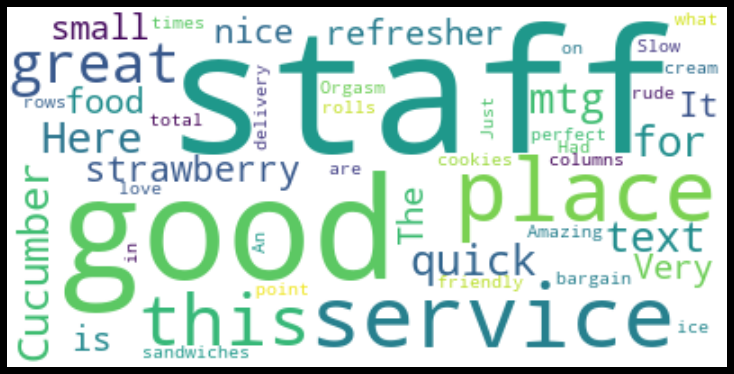

In [ ]:
dontinclude = ['Length', 'Name','dtype','Mentions','int64']
wordcloud = WordCloud(stopwords = dontinclude, background_color = 'white').generate(str(pd.DataFrame(tip,columns=['text'])))
plt.figure(figsize = (10, 10), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Using a word cloud allowed us to take a look into which words were most commonly used in the the tip dataset. Looking at the cloud, we see that words related to service and quality of ambience in a restaurant appeared more than words related to specific goods. This suggests a possible relationship that the overall quality of the experience may matter more to haveing a positive yelp review than just having quality goods.

In this specific word cloud, we can see keywords like "quick", "good", "positive", "staff" pop up. This shows that the fundamentals of a restaurants are extremely valued by customers coming in. All they are looking for is a friendly waiter to serve them, good lighting and smells around them, and a comfortable place to sit with good food served quickly to them at the end. This is line with our findings above and shows that there are common factors across businesses that can help us understand what makes a good one.

Text(0, 0.5, 'Frequency')

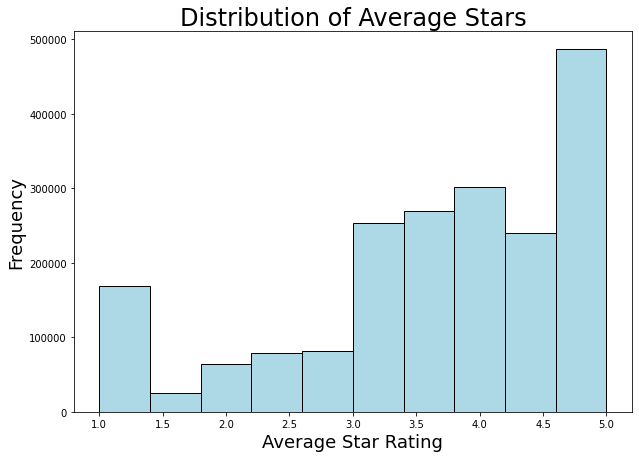

In [ ]:
#plt.hist(ur["review_count"]);
#plt.style.use('ggplot')
#plt.hist(pd.DataFrame(ur,columns=['review_count']), bins=10)
ur["average_stars"].plot(kind='hist', color='lightblue', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Average Stars', size=24)
plt.xlabel('Average Star Rating', size=18)
plt.ylabel('Frequency', size=18)


When looking at the distribution of average star rating of yelp reviewers, it because apparent that the distribution has a left skew. This suggests that most reviewers tend to rate business that they believe is above average. Interestingly on the left end of the distribution, there is a significant drop between star ratings of 1.5 and 3.0. This suggests that below-average restaurants do not have significant engagement. There is a significant jump for 1-star reviews meaning that some of the worst restaurants have high engagement levels. Perpahs this is suggestive that any publicity is good publicity.

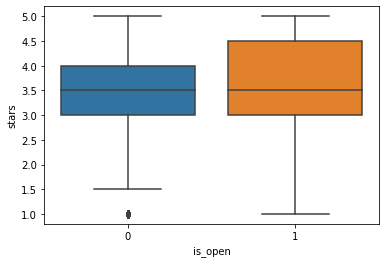

In [ ]:
ax = sns.boxplot(x="is_open", y="stars", data=bsns)

As a side note, there is no clear difference in the restaurant's review and whether or not it is closed. As seen by the box and whisker plot, the median is identical, and the ranges are quite similar outside of the fact that closed restaurants tend to have a slightly higher rating. This suggests that restaurant reviews are not obviously visually predictive of whether a restaurant is open. 

In [ ]:
print(ur['review_count'])

0          553
1          564
2           60
3          206
4          485
          ... 
1968698      9
1968699     10
1968700      1
1968701      2
1968702      2
Name: review_count, Length: 1968703, dtype: int64


Next, we wanted to examine the distribution of review counts by reviews; the step above shows us the count of reviews for each reviewer.

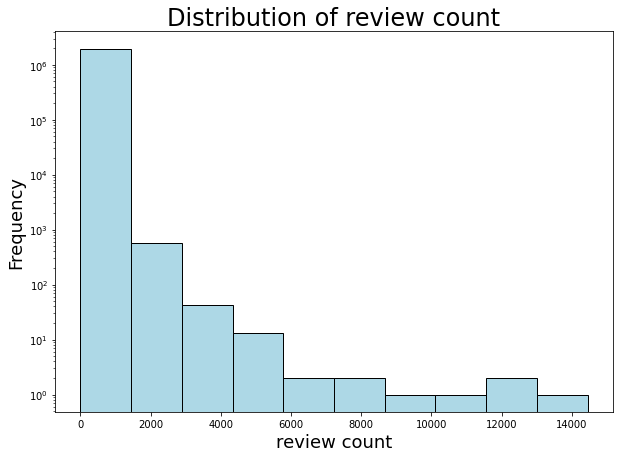

In [ ]:
ur["review_count"].plot(kind='hist', color='lightblue', edgecolor='black', figsize=(10,7))
plt.title('Distribution of review count', size=24)
plt.xlabel('review count', size=18)
plt.ylabel('Frequency', size=18)
plt.yscale("log")


Looking at the above distribution, we can see that it has a right skew, meaning that most yelp reviewers tend to leave a few reviews. This is suggestive that most reviewers are not avid participants on yelp and only leave a review for select businesses. Considering this left skew, it is important to understand that most reviews come from reviewers that have very strong opinions about the said business, which may influence which business gets very positive or very negative reviews.

Text(0, 0.5, 'fans')

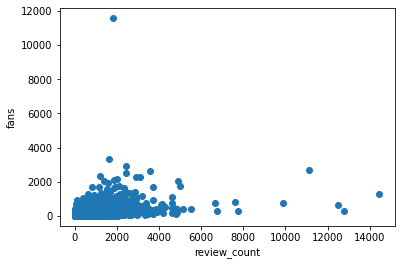

In [ ]:
x=ur.review_count
y=ur.fans
plt.scatter(x,y)
plt.xlabel("review_count")
plt.ylabel("fans")

Next, we decided to create several scatter plots to examine the relationship between several important variables for user reviews. The first relationship we wanted to discuss was if being an avid yelp reviewer gave you more fans and, as a result, more engagement. According to the scatter plot, there seems to be a slightly positive correlation. There are also several outliers. Most of them show people who review a lot without getting more fans, while the vertical outlier may be some one who is notable in the yelp community because they don't review much but have many followers.

Text(0, 0.5, 'fans')

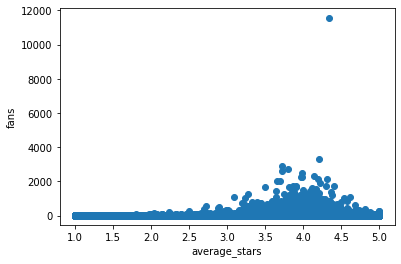

In [ ]:
x=ur.average_stars
y=ur.fans
plt.scatter(x,y)
plt.xlabel("average_stars")
plt.ylabel("fans")

Next, we looked at the relationship between average stars and fans. There seems to be a greater concentration around the 3.5 to 4.5 range, suggesting that there is more engagement with above-average reviewer ratings, meaning there is a left skew. Interestingly the extreme ends of the distributions tend to have fewer fans. Overall there appears to be a slightly positive correlation between average stars and fans.

Text(0, 0.5, 'useful')

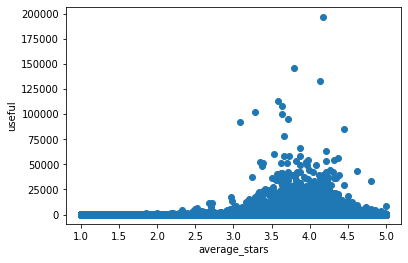

In [ ]:
x=ur.average_stars
y=ur.useful
plt.scatter(x,y)
plt.xlabel("average_stars")
plt.ylabel("useful")

Looking at the relationship between average stars and the post's interaction, saying it was useful seems to be concentrated around the same area as above. This might suggest that reviews that aren't completely negative or completely positive tend to give business reviews with the best insight. Overall this scatter plot also has a slightly positive relationship.

Text(0, 0.5, 'review_count')

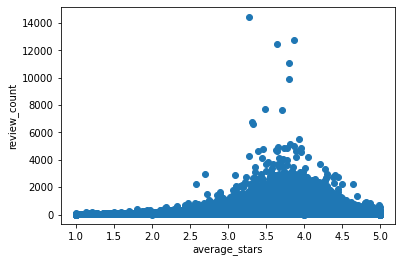

In [ ]:
x=ur.average_stars
y=ur.review_count
plt.scatter(x,y)
plt.xlabel("average_stars")
plt.ylabel("review_count")

This scatters plot shows that most reviews tend to be average, which coincides with the idea that most businesses are average. Overall there is a slightly positive correlation.

Text(0, 0.5, 'fans')

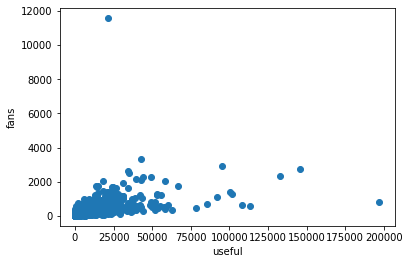

In [ ]:
x=ur.useful
y=ur.fans
plt.scatter(x,y)
plt.xlabel("useful")
plt.ylabel("fans")

The above scatterplot shows the relationship between useful reviews and fans. The plot shows a right skew because most yelpers don't have more than about 50000 useful reviews. Visually, there appears to be a  positive correlation between useful reviews and fans. Suggesting that the more useful reviews that one has the more trustworthy the said reviewer, which means the will have more fans.

Text(0, 0.5, 'compliment_sum')

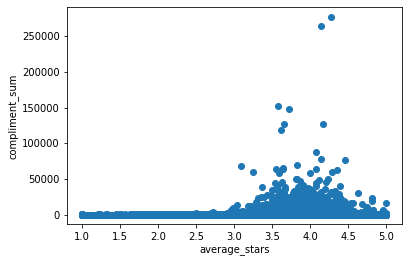

In [ ]:
x=ur.average_stars
y=ur.compliment_sum
plt.scatter(x,y)
plt.xlabel("average_stars")
plt.ylabel("compliment_sum")

The above scatterplot shows the relationship between the sum of compliments and average stars. The plot shows a left skew, so most of the data is greater than 3 star reviews. Visually, there appears to be a slightly positive correlation between sum of compliments and average stars. Suggesting that higher reviews may lead to more engagement from other yelpers.

In [ ]:
mod = smf.ols('compliment_sum ~ average_stars', data=ur)
res = mod.fit()
print(res.summary())

beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('myreg.tex', 'w')
f.write(beginningtex)
f.write(res.summary().as_latex())
f.write(endtex)
f.close()

                            OLS Regression Results                            
Dep. Variable:         compliment_sum   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     61.93
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           3.56e-15
Time:                        17:29:05   Log-Likelihood:            -1.5043e+07
No. Observations:             1968703   AIC:                         3.009e+07
Df Residuals:                 1968701   BIC:                         3.009e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.9408      1.174      5.062

The R-squared value for each model represents the proportion of the variation in the dependent variable that can be accounted for by variation in independent variables. According to the r-sqaured from the regression, 0 percent of the variation in total compliments is accounted for by the variation in average stars. Having said that, the coefficients of the variables suggest otherwise. The coefficient of average stars suggests that for every additional star given in a review you can expect to see

In [ ]:
mod = smf.ols('fans ~ average_stars', data=ur)
model = mod.fit()
print(model.summary())

beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('myreg.tex', 'w')
f.write(beginningtex)
f.write(model.summary().as_latex())
f.write(endtex)
f.close()

                            OLS Regression Results                            
Dep. Variable:                   fans   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     552.9
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          3.09e-122
Time:                        17:37:57   Log-Likelihood:            -8.3330e+06
No. Observations:             1968703   AIC:                         1.667e+07
Df Residuals:                 1968701   BIC:                         1.667e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5895      0.039     15.180

According to the r-sqaured from the regression, 0 percent of the variation in fans is accounted for by the variation in average stars. The coefficients supports that same line of thought as the average stars coefficient of .24 suggests that for every additional star given in a review you can expect to see .24 more fans. In other words, giving higher reviews does not necessarily mean that you will gain more fans on yelp. This suggest that engagement with the reviewers is not based on the star rating given. The p-value of our regression is 0 which suggests that these findings are statistically significant. Perhaps using useful yelp reviews to explain for fans will show a clearer picture as one can assume that more useful reviews will lead to fans.

## Conclusions, Takeaways and Development

From the business side, our analysis found the strange result that accessibility didn't always correlate to a good rating on Yelp. It seems customers prefer fancier restaurants with reservations and appointments than lower end establishments with televisions, drive-thru's and happy hours. Even being open 24 hours negatively affects ratings on Yelp. We also saw that recieving table service at a restaurant may encourage customers to write a reviwe as opposed to drive-thru or counter service. 

Upon conducting our investigation, it becomes clear that certain business elements are more important from the consumer perspective. In particular, we noticed that the business as a service was more important as words such as service, quick, friendly were commonly mentioned in tips. In contrast, comments related to the quality of the products were infrequent in comparison. Furthermore, from the reviewer's perspective, we noticed a slight engagement trend, which may translate to more consumers in a business. Specifically, we noticed that average star rating reviews had a slightly positive correlation with their fan count, how useful people thought the review was, the number of reviews, and total interaction with the review. This is suggestive of a relationship between star reviews and the publicity a business receives.

From this we understand that customers like to engage with businesses. We see this in the fact that sitting inside a restaurant and being catered to at the table leads to more reviews. As we discussed previously, sitting inside leads to more interaction with the ambiance of the restaurants, whereas picking up food at the counter and leaving is a seemingly superficial, transactional engagement with a business that doesn't necessarily lead to reviews or ratings.

This goes extremely well with the findings from our analysis of the business dataset. Since we were dealing with factors independent of the quality of the product and we were dealing with features of the businesses, we found out that it is often about how a customer is treated instead of what they are treated with/what they end up paying for. This is interesting to see because it doesn't seem so obvious. You would not be beyond reason to assume that people will tolerate slightly slower service, higher prices, or a cheaper-looking restaurant if the food at the end of the day was great. But this doesn't seem to be the case. We looked at the 3 major cities where the most reviews were found and despite being very, very different from each other, we saw the same underlying features that gave them so many high reviews: it was all about parking, WiFi, being good to their kids (because customers go to restaurants and want to have a good time with their family), being acceptive of conveniences like credit cards, and having reasonable prices in the range category of 1 and 2.

All in all, the results of our analysis show us that it is often how a customer is treated that makes the difference at the end. This can characterized in the following manner: throughout life we go to many places where we will encounter good quality items - be that food, clothing, or any other services. Quality inherently, in itself does not stand out. It is rather the associations with quality that make certain experiences memorable for this. This is the theme that we have extracted from our analysis. When the customer is king and treated as such, we see that just performing the fundamentals of a restaurant (provide service at the table, allowing them to pay with a credit card, having a space for kids to play in, being quick in preparing orders) is all you need to leave a lasting impression on them and lead to a review and high rating. Now, an important distinction that needs to be made is that providing services and treating the customer well isn't the same as being accessible. A few paragraphs above we did establish that accessibility seems to be counter-intuitive. What works is engagement - getting the customer to the physical site of the business, letting them park their car in the provided space, letting them sit inside, and letting them enjoy everything that is on display - from decorations to service and everything in between.

And naturally, when we see this kind of engagement between a customer and a business, we see more reviews and in turn, a higher rating. This is what businesses can take away from our analysis today. Just get the fundamentals right, don't go too extra in some measures (no need to spend extra and hire extra for 24/7 service if the customers don't value it), and remember that when the customer shows up, you show them the best side of the restaurant and get them their food, as fast as possible, while they spend quality time with their family.